In [4]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score, precision_score, recall_score
import warnings
import keras

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Input
from mlxtend.plotting import plot_confusion_matrix
import pickle           
import joblib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Import necessary libraries from scikit-learn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier  

In [5]:
# ignore all DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [6]:
# Loading the dataset
dataset = pd.read_csv('analytics.csv')
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
dataset.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [9]:
# Getting information from the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
#Checking for duplicate values
dataset.duplicated().sum()

np.int64(0)

In [11]:
# Check for missing values before replacement
print("Missing values before replacement:")
dataset.isnull().sum()    

Missing values before replacement:


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [12]:
# counting the number of entries and columns 
dataset.shape   # meaning there are 1470 row and 35 columns 

(1470, 35)

In [13]:
# Find rows with NaN values
rows_with_nan = dataset[dataset.isna().any(axis=1)]

# Display the rows with NaN values
print(rows_with_nan)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]


In [14]:
# Replace all NaN values with zero
dataset = dataset.fillna(0)

# Verify that there are no more NaN values
print(dataset.isna().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
# Check if any row contains floats or strings
has_floats = dataset.applymap(lambda x: isinstance(x, float)).any(axis=1)
has_strings = dataset.applymap(lambda x: isinstance(x, str)).any(axis=1)

# Summarize results
print(f"Rows containing floats: {has_floats.sum()}")
print(f"Rows containing strings: {has_strings.sum()}")

Rows containing floats: 0
Rows containing strings: 1470


C:\Users\david\AppData\Local\Temp\ipykernel_13068\1523369355.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  has_floats = dataset.applymap(lambda x: isinstance(x, float)).any(axis=1)
C:\Users\david\AppData\Local\Temp\ipykernel_13068\1523369355.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  has_strings = dataset.applymap(lambda x: isinstance(x, str)).any(axis=1)


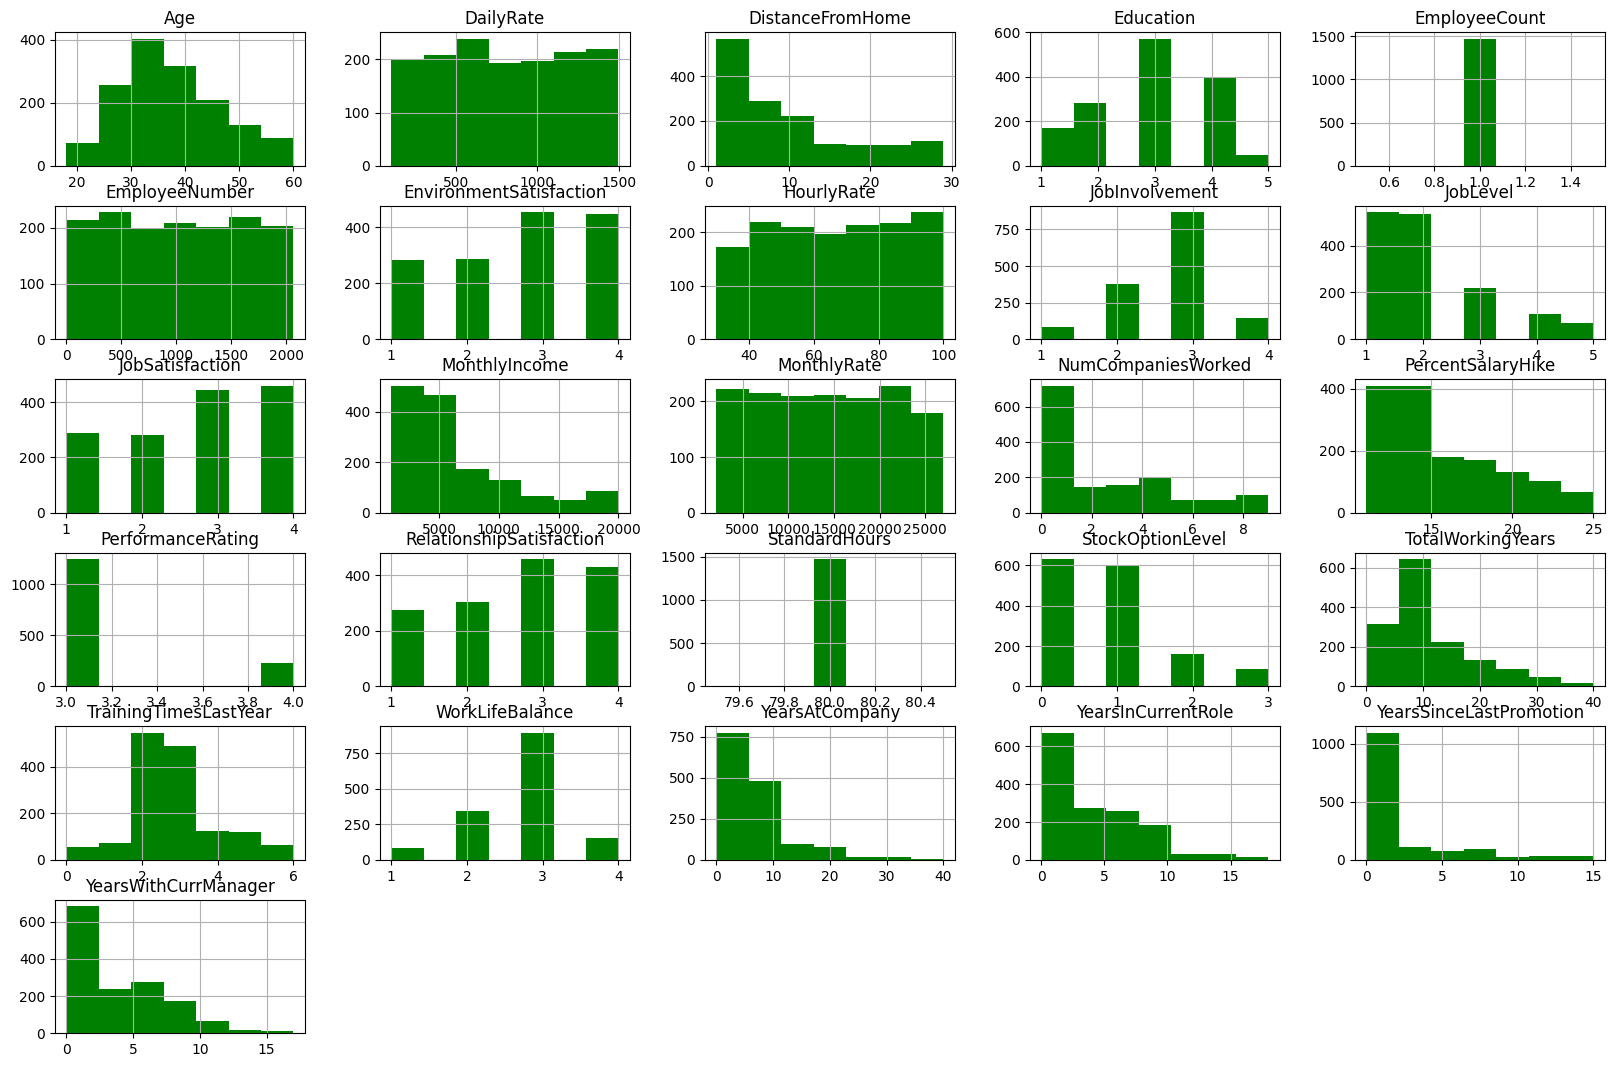

<Figure size 640x480 with 0 Axes>

In [16]:
# using the Histogram chart checking for any outliers
dataset.hist(bins =7,figsize=(20,13),color='green')
plt.show()
plt.tight_layout()

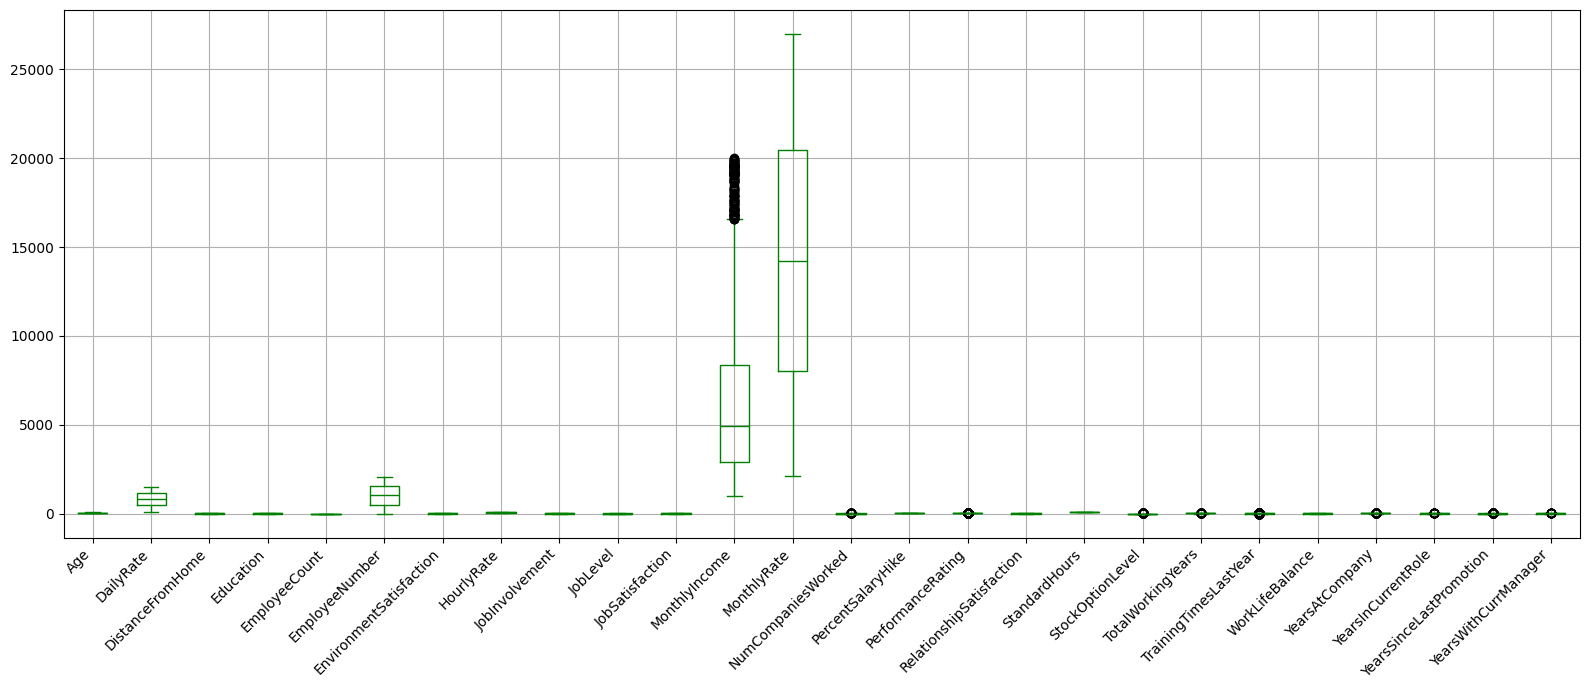

In [17]:
# using the Histogram chart checking for any outliers
dataset.boxplot(figsize=(16,7),color='green') 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

          MonthlyIncome                      Age        JobSatisfaction
                   mean  median count       mean median            mean
Attrition                                                              
No          6832.739659  5204.0  1233  37.561233   36.0        2.778589
Yes         4787.092827  3202.0   237  33.607595   32.0        2.468354


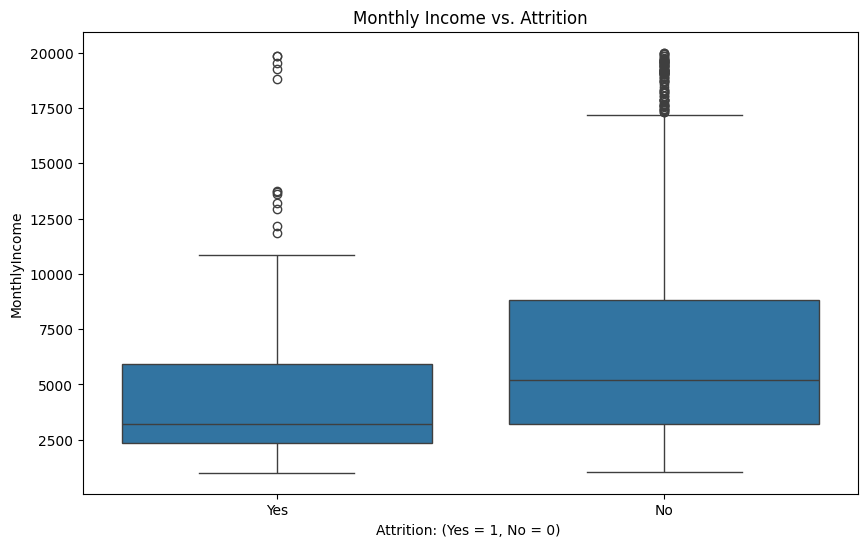

<Figure size 640x480 with 0 Axes>

In [18]:
# Attrition vs. MonthlyIncome and Age
attrition_groups = dataset.groupby('Attrition').agg({
    'MonthlyIncome': ['mean', 'median', 'count'],
    'Age': ['mean', 'median'],
    'JobSatisfaction': 'mean'
})
print(attrition_groups)

# Visualization: MonthlyIncome by Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=dataset)  # Attrition (No = 0, Yes = 1)
plt.title("Monthly Income vs. Attrition")
plt.xlabel("Attrition: (Yes = 1, No = 0) ")
plt.show()
plt.tight_layout()

# Insignt: Employees who leave (Attrition=1) likely have lower median incomes and job satisfaction.

                       MonthlyIncome              YearsAtCompany
                                mean    max   min           mean
Department                                                      
Human Resources          6654.507937  19717  1555       7.238095
Research & Development   6281.252862  19999  1009       6.864724
Sales                    6959.172646  19847  1052       7.284753


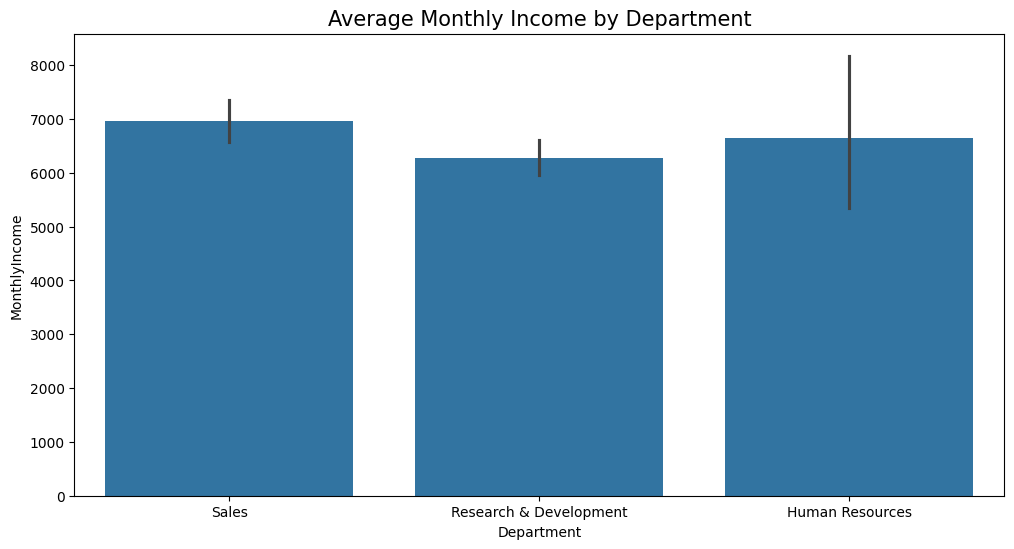

<Figure size 640x480 with 0 Axes>

In [19]:
# Department vs. MonthlyIncome
department_groups = dataset.groupby('Department').agg({
    'MonthlyIncome': ['mean', 'max', 'min'],
    'YearsAtCompany': 'mean'
})
print(department_groups)

# Visualization: Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='MonthlyIncome', data=dataset, estimator=np.mean)
plt.title("Average Monthly Income by Department", fontsize= '15')
plt.show()
plt.tight_layout()

# Insight: IT or R&D departments might have higher average salaries compared to Sales.

                           WorkLifeBalance  MonthlyIncome
JobRole                                                  
Manager                           2.774510        17454.5
Research Director                 2.862500        16510.0
Healthcare Representative         2.702290         6811.0
Manufacturing Director            2.765517         6447.0
Sales Executive                   2.803681         6231.0
Human Resources                   2.923077         3093.0
Research Scientist                2.678082         2887.5
Laboratory Technician             2.718147         2886.0
Sales Representative              2.891566         2579.0


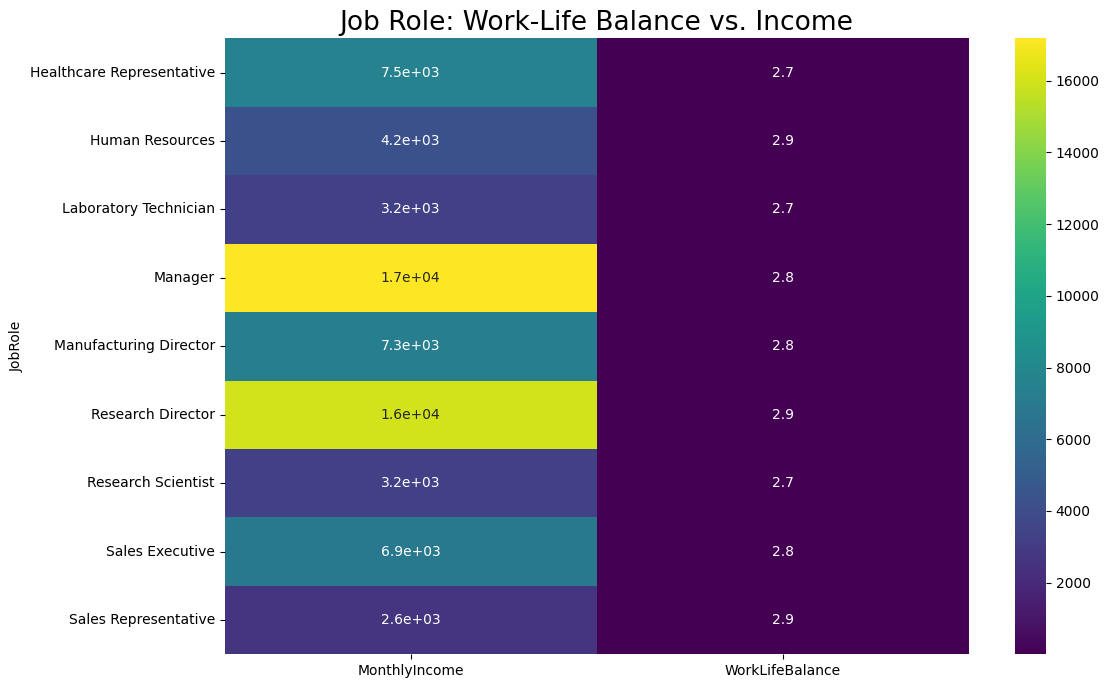

<Figure size 640x480 with 0 Axes>

In [20]:
# JobRole vs. WorkLifeBalance
jobrole_groups = dataset.groupby('JobRole').agg({
    'WorkLifeBalance': 'mean',
    'MonthlyIncome': 'median'
}).sort_values('MonthlyIncome', ascending=False)
print(jobrole_groups)

# Visualization: Heatmap
plt.figure(figsize=(12, 8))
pivot = dataset.pivot_table(index='JobRole', values=['WorkLifeBalance', 'MonthlyIncome'], aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.title("Job Role: Work-Life Balance vs. Income",fontsize= '19')
plt.show()
plt.tight_layout()

# Insight: Higher-paying roles (e.g., Managers) may report lower work-life balance.

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Gender                                                      
Female                  49                117            422
Male                   101                160            621


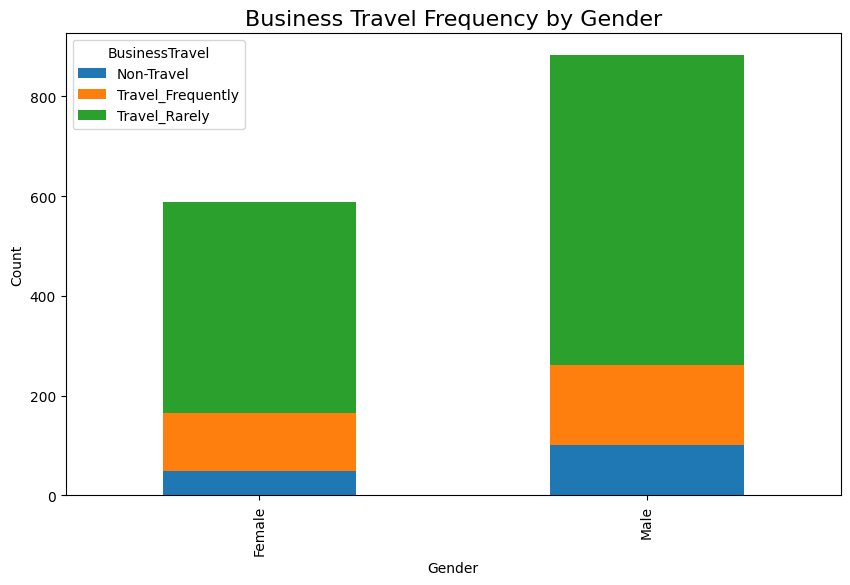

<Figure size 640x480 with 0 Axes>

In [21]:
# Gender vs. BusinessTravel
gender_travel = dataset.groupby(['Gender', 'BusinessTravel']).size().unstack()
print(gender_travel)

# Visualization: Stacked bar chart
gender_travel.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Business Travel Frequency by Gender", fontsize= '16')
plt.ylabel("Count")
plt.show()
plt.tight_layout()

# Insight: Males may travel more frequently for work compared to females

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
MaritalStatus                                               
Divorced                44                 63            220
Married                 59                118            496
Single                  47                 96            327


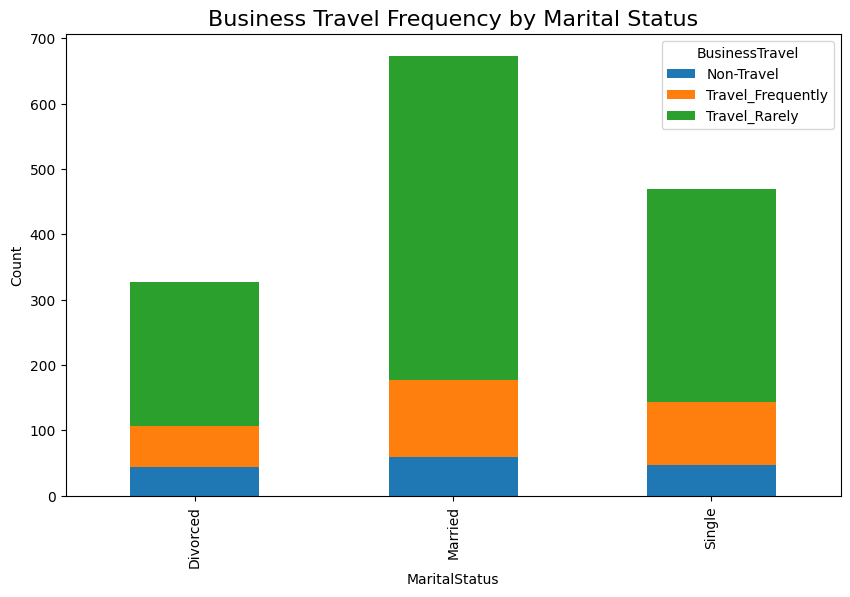

<Figure size 640x480 with 0 Axes>

In [22]:
# Gender vs. BusinessTravel
gender_travel = dataset.groupby(['MaritalStatus', 'BusinessTravel']).size().unstack()
print(gender_travel)

# Visualization: Stacked bar chart
gender_travel.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Business Travel Frequency by Marital Status", fontsize= '16')
plt.ylabel("Count")
plt.show()
plt.tight_layout()

                  YearsAtCompany  MonthlyIncome
EducationField                                 
Marketing               7.559748         6118.0
Medical                 7.105603         4722.0
Life Sciences           6.993399         4943.0
Human Resources         6.777778         3886.0
Technical Degree        6.590909         4318.0
Other                   6.243902         4561.0


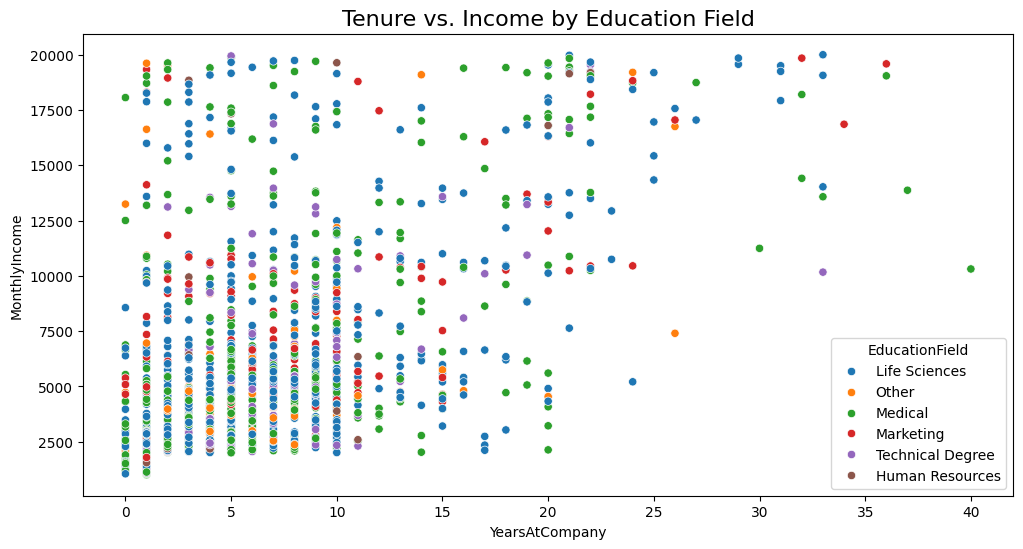

<Figure size 640x480 with 0 Axes>

In [23]:
# EducationField vs. Tenure
education_groups = dataset.groupby('EducationField').agg({
    'YearsAtCompany': 'mean',
    'MonthlyIncome': 'median'
}).sort_values('YearsAtCompany', ascending=False)
print(education_groups)

# Visualization: Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', hue='EducationField', data=dataset)
plt.title("Tenure vs. Income by Education Field", fontsize= '16')
plt.show()
plt.tight_layout()

# Insight: Employees with technical degrees (e.g., Engineering) may have longer tenure and higher salaries.

JobLevel                          1            2             3             4  \
Department                                                                     
Human Resources         2733.212121  5563.461538   9623.000000  16147.500000   
Research & Development  2840.064516  5291.238434  10170.488372  15634.676471   
Sales                   2506.723684  5746.054167   9282.289157  15166.264706   

JobLevel                           5  
Department                            
Human Resources         19197.857143  
Research & Development  19218.510204  
Sales                   19088.000000  


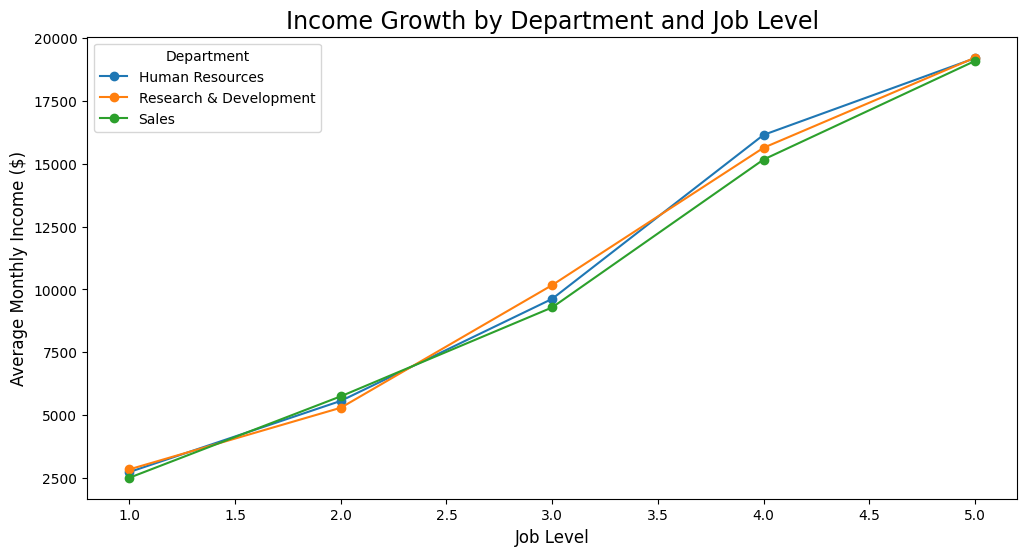

<Figure size 640x480 with 0 Axes>

In [24]:
# Department and JobLevel vs. Income
dept_joblevel = dataset.groupby(['Department', 'JobLevel'])['MonthlyIncome'].mean().unstack()
print(dept_joblevel)

# Visualization: Line plot
dept_joblevel.T.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Income Growth by Department and Job Level", fontsize= '17')
plt.xlabel("Job Level", fontsize= '12')
plt.ylabel("Average Monthly Income ($)", fontsize= '12')
plt.show()
plt.tight_layout()

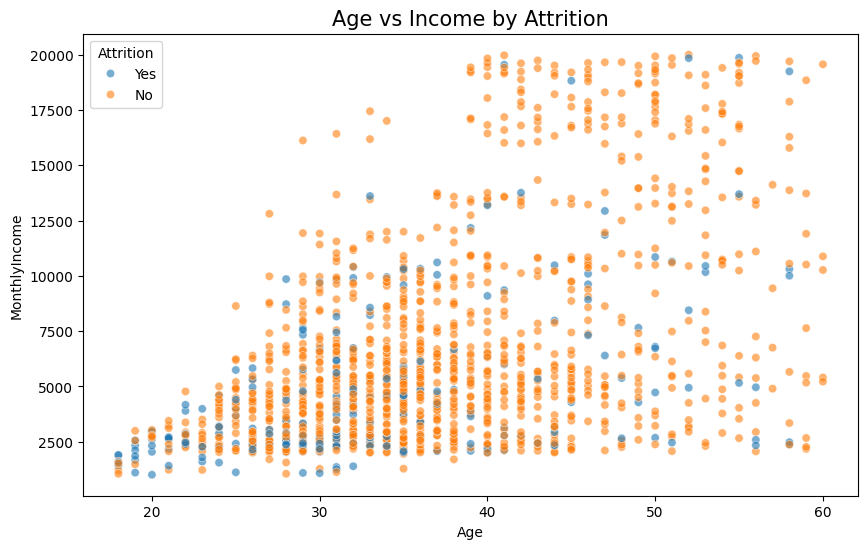

<Figure size 640x480 with 0 Axes>

In [25]:
# Anaysing Age vs Monthly Income Attrition
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=dataset, alpha=0.6)
plt.title('Age vs Income by Attrition', fontsize=15)
plt.show()
plt.tight_layout()

# Key Insight

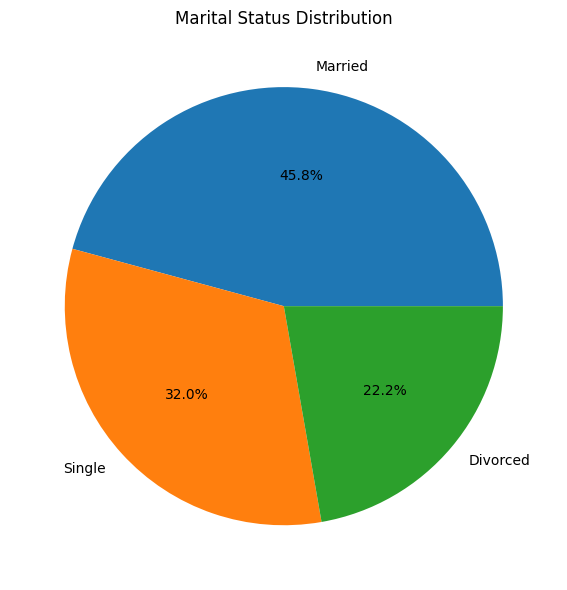

In [27]:
# Marital status Distribution

plt.figure(figsize=(6, 6))
dataset['MaritalStatus'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


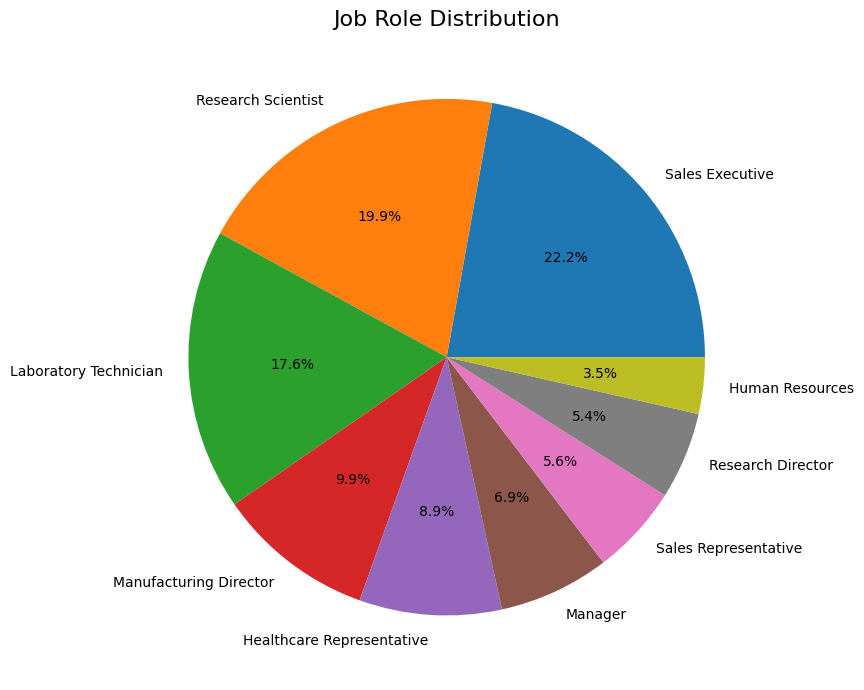

In [28]:
# Job Role Distribution

plt.figure(figsize=(10, 7))
dataset['JobRole'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Job Role Distribution', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_13068\1605158563.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_rate.values, y=attrition_rate.index, palette='viridis')


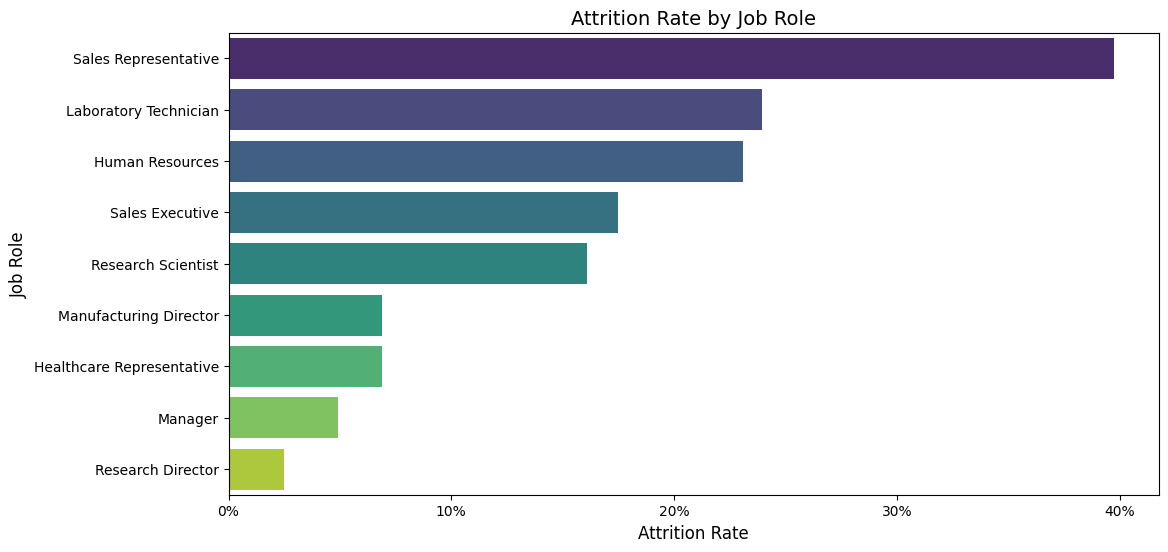

<Figure size 640x480 with 0 Axes>

In [ ]:
# attrition rates
attrition_rate = dataset.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)['Yes']
attrition_rate = attrition_rate.sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(12,6))
sns.barplot(x=attrition_rate.values, y=attrition_rate.index, palette='viridis')
plt.title('Attrition Rate by Job Role', fontsize=14)
plt.xlabel('Attrition Rate', fontsize=12)
plt.ylabel('Job Role', fontsize=12)
plt.xticks(ticks=[0, 0.1, 0.2, 0.3, 0.4], labels=['0%', '10%', '20%', '30%', '40%'])
plt.show()
plt.tight_layout()

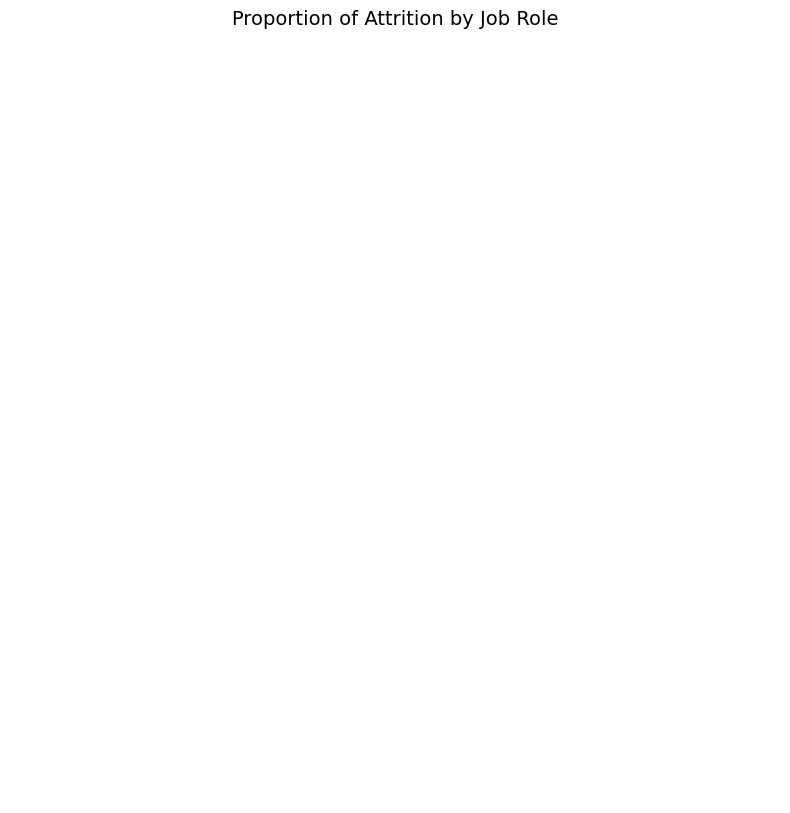

In [ ]:
# Pie Chart (Attrition Distribution by Job Role)# 
# Calculate counts
attrition_counts = dataset[dataset['Attrition'] == 'Yes']['JobRole'].value_counts()

# Plotting the data
plt.figure(figsize=(10,10))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Attrition by Job Role', fontsize=14)
plt.show()

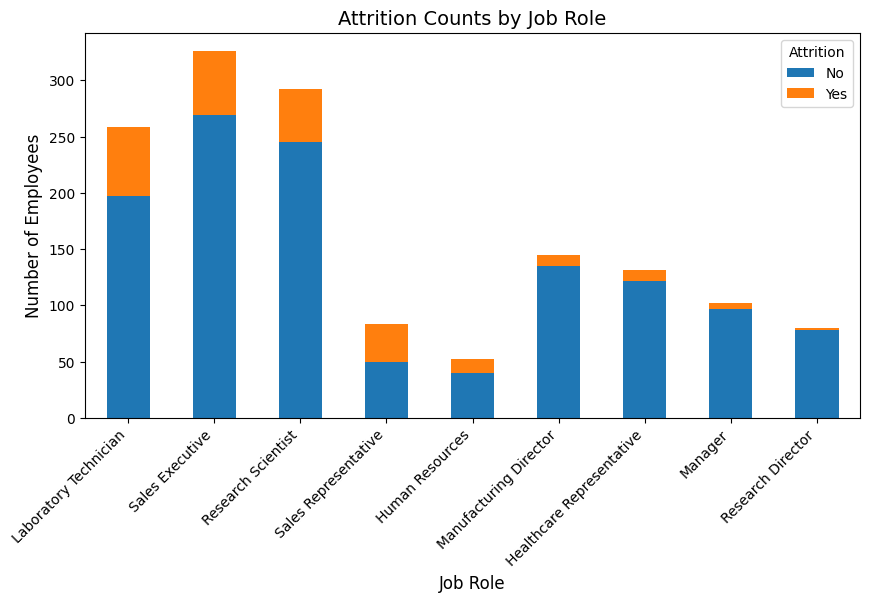

In [31]:
# Attrition Counts by Job Role
# Create cross-tab
ct = pd.crosstab(dataset['JobRole'], dataset['Attrition']).sort_values(by='Yes', ascending=False)

# Plot
ct.plot(kind='bar', stacked=True, figsize=(10,5), color=['#1f77b4', '#ff7f0e'])
plt.title('Attrition Counts by Job Role', fontsize=14)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Attrition')
plt.xticks(rotation=45, ha='right')
plt.show()

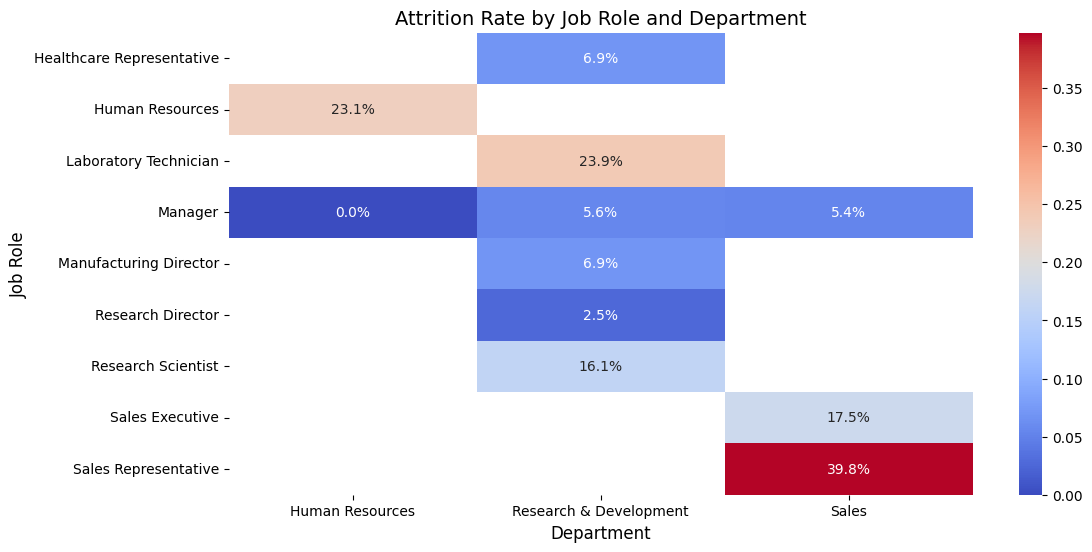

In [32]:
# Attrition Rate by Job Role and Department

# Create pivot table
pivot_table = dataset.pivot_table(values='Attrition', 
                            index='JobRole', 
                            columns='Department', 
                            aggfunc=lambda x: (x == 'Yes').mean())

# Plot
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt=".1%", cmap='coolwarm')
plt.title('Attrition Rate by Job Role and Department', fontsize=14)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Job Role', fontsize=12)
plt.show()

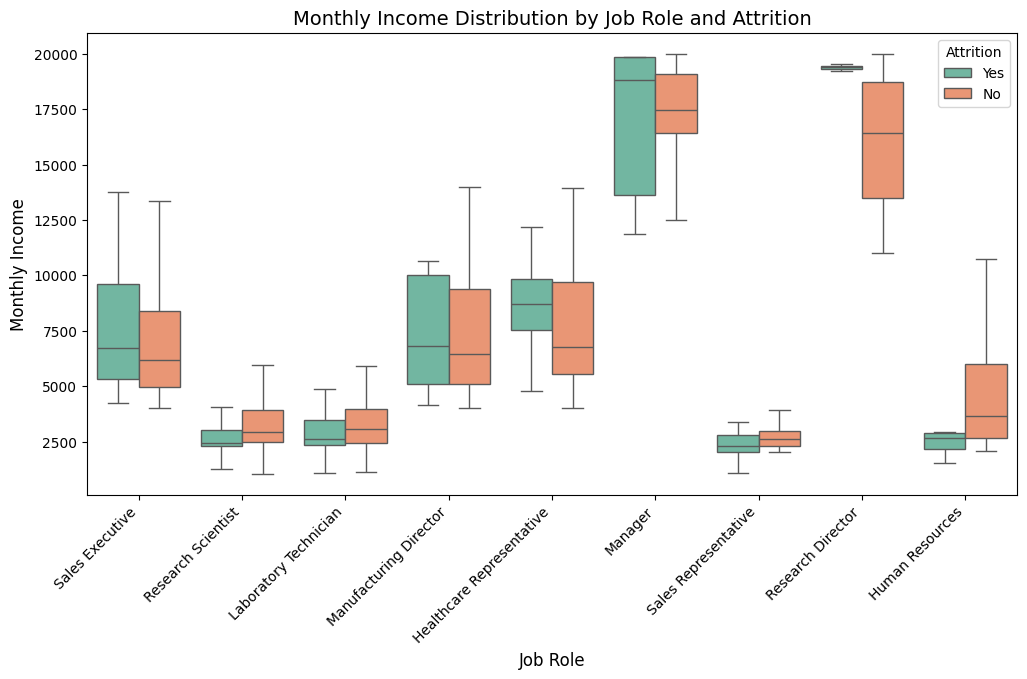

In [ ]:
# Monthly Income Distribution by Job Role and Attrition
plt.figure(figsize=(12,6))
sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=dataset,
           palette='Set2', showfliers=False)
plt.title('Monthly Income Distribution by Job Role and Attrition', fontsize=14)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Monthly Income', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition')
plt.show()

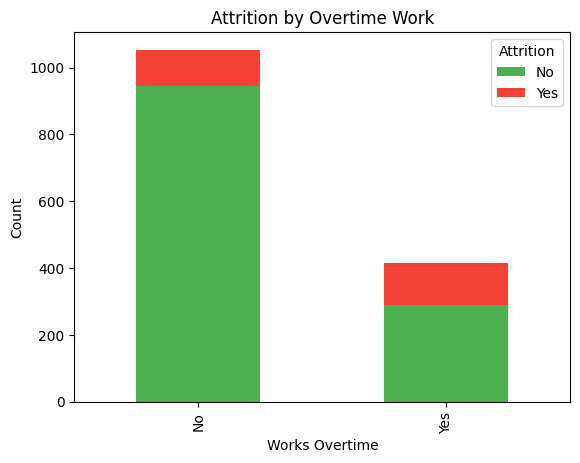

In [34]:
# Stacked Bar Plot: OverTime vs. Attrition

pd.crosstab(dataset['OverTime'], dataset['Attrition']).plot(kind='bar', stacked=True, color=['#4CAF50', '#F44336'])
plt.title('Attrition by Overtime Work')
plt.xlabel('Works Overtime')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

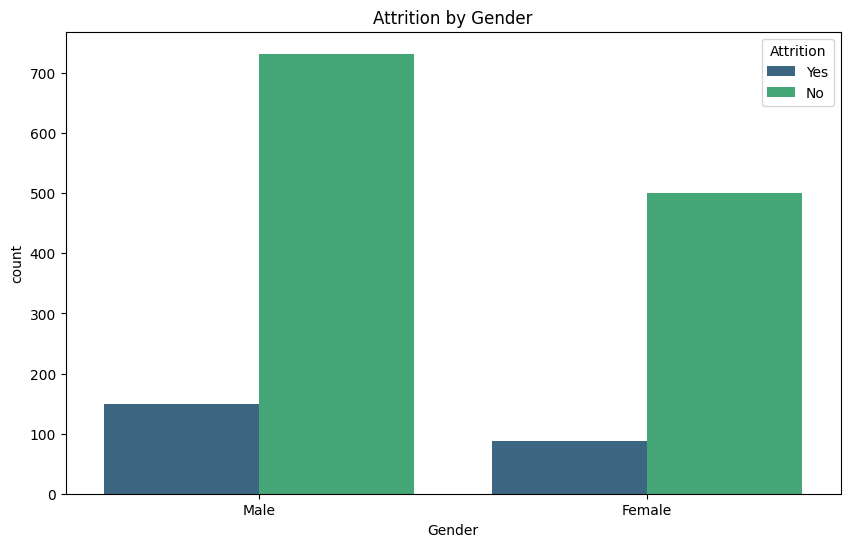

<Figure size 640x480 with 0 Axes>

In [35]:
# Grouped Bar Plot: Gender & MaritalStatus vs. Attrition

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attrition', data=dataset, palette='viridis', 
              order=['Male', 'Female'],  # Custom order
              hue_order=['Yes', 'No'])   # Ensure attrition order
plt.title('Attrition by Gender')
plt.show()
plt.tight_layout()


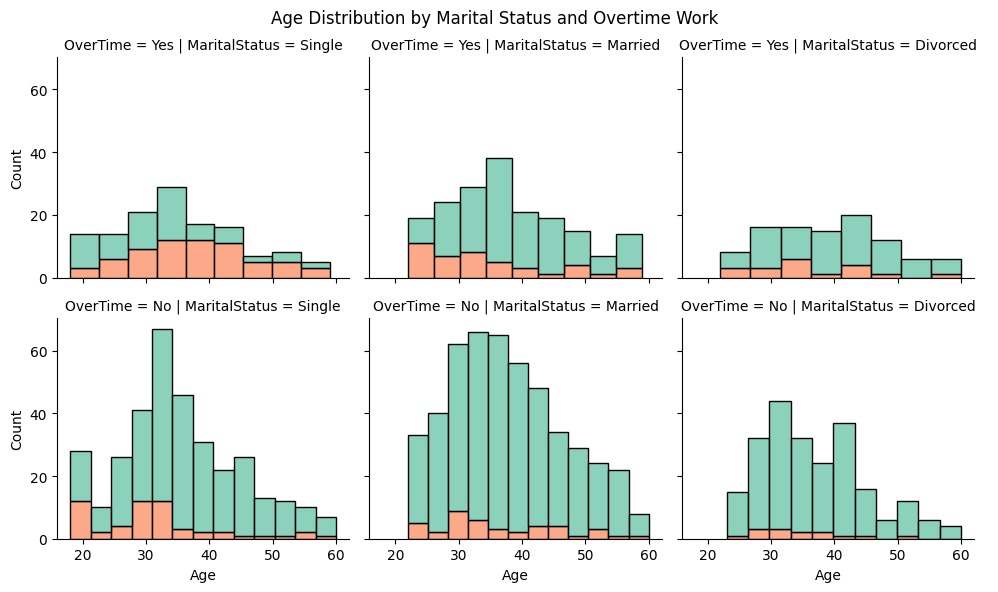

<Figure size 640x480 with 0 Axes>

In [36]:
# Facet Grid: MaritalStatus + OverTime

g = sns.FacetGrid(dataset, col='MaritalStatus', row='OverTime', height=3, aspect=1.1)
g.map_dataframe(sns.histplot, x='Age', hue='Attrition', multiple='stack', palette='Set2')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution by Marital Status and Overtime Work')
plt.show()
plt.tight_layout()

# Insight: Analyze how age distributions differ across marital status and overtime work.

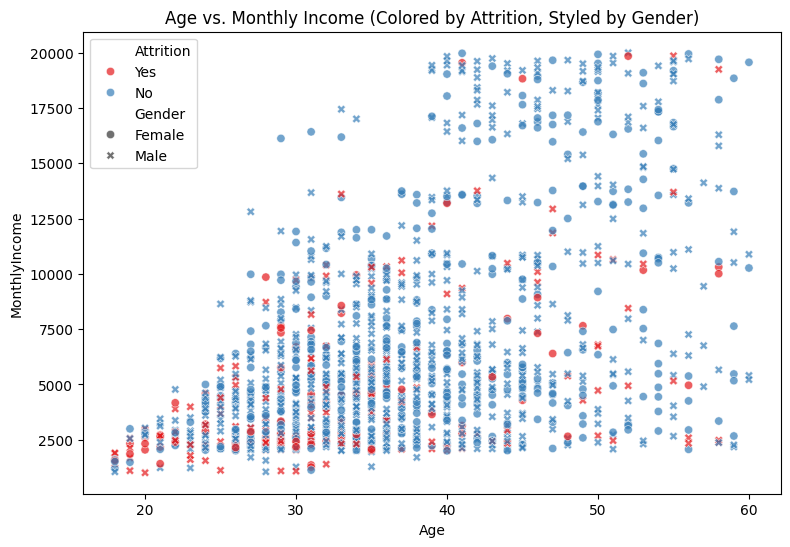

<Figure size 640x480 with 0 Axes>

In [37]:
# Scatter Plot with Hue, Combined Analysis (Age + MonthlyIncome + Gender)

plt.figure(figsize=(9, 6))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=dataset, 
                palette='Set1', alpha=0.7, style='Gender')
plt.title('Age vs. Monthly Income (Colored by Attrition, Styled by Gender)')
plt.show()
plt.tight_layout()

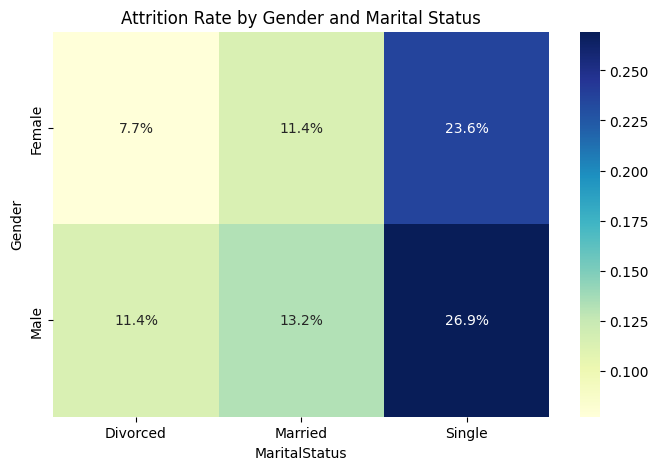

<Figure size 640x480 with 0 Axes>

In [38]:
# Heatmap (Gender + MaritalStatus)

pivot_table = dataset.groupby(['Gender', 'MaritalStatus'])['Attrition'].apply(lambda x: (x == 'Yes').mean()).unstack()
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, fmt=".1%", cmap='YlGnBu')
plt.title('Attrition Rate by Gender and Marital Status')
plt.show()
plt.tight_layout()

# Insight: Compare combinations like "Single Males" vs. "Married Females".

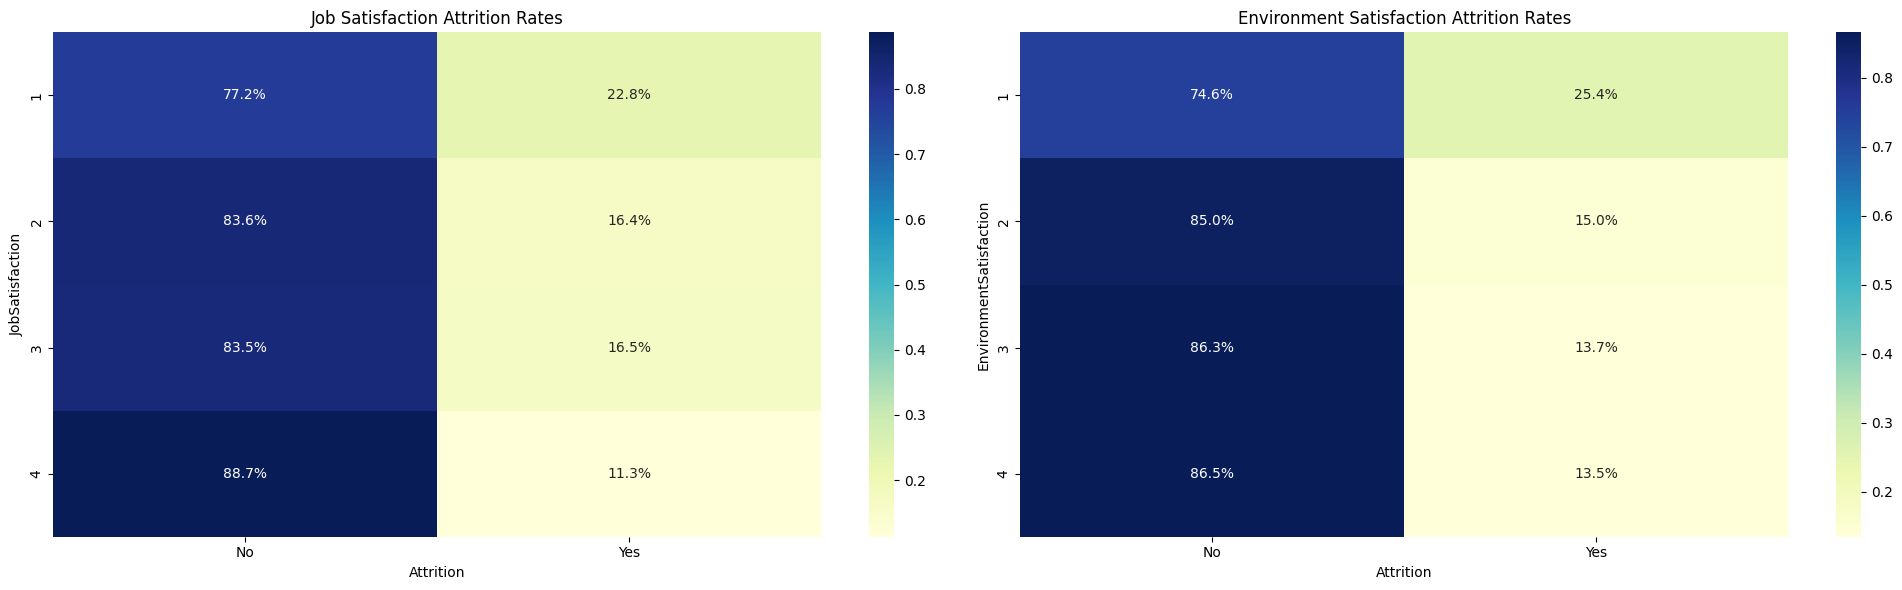

In [ ]:
# Initailizin the subplot visualisation
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Job Satisfaction heatmap
job_heatmap = pd.crosstab(dataset['JobSatisfaction'], dataset['Attrition'], normalize='index')
sns.heatmap(job_heatmap, annot=True, fmt=".1%", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Job Satisfaction Attrition Rates")

# Environment Satisfaction heatmap
env_heatmap = pd.crosstab(dataset['EnvironmentSatisfaction'], dataset['Attrition'], normalize='index')
sns.heatmap(env_heatmap, annot=True, fmt=".1%", cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Environment Satisfaction Attrition Rates")
plt.tight_layout()
plt.show()

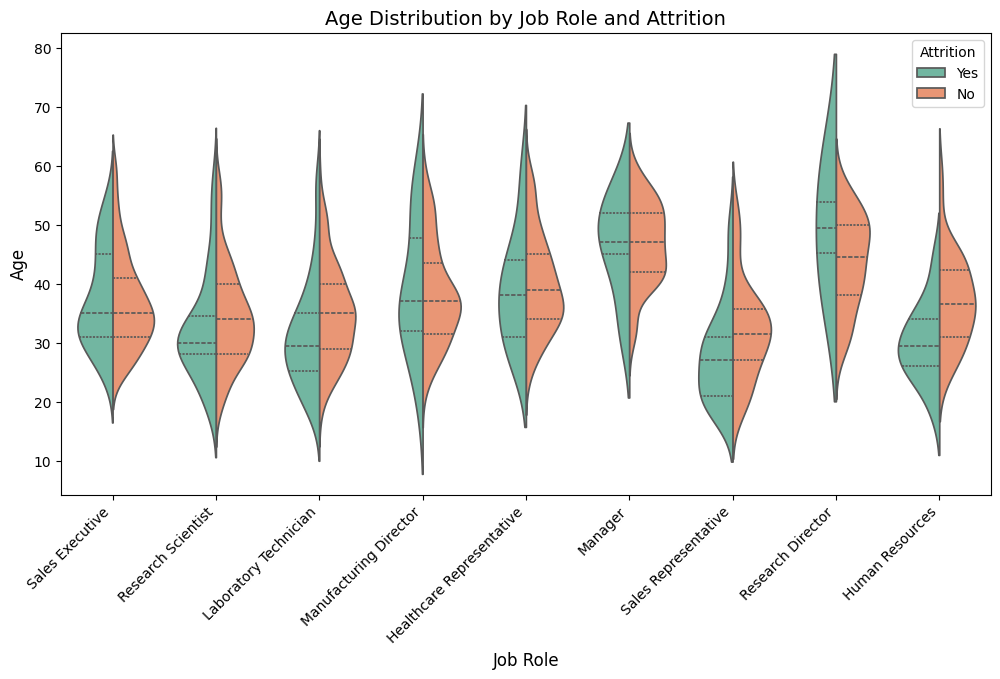

In [40]:
# Violin Plot (Age Distribution)
plt.figure(figsize=(12,6))
sns.violinplot(x='JobRole', y='Age', hue='Attrition', data=dataset,
              split=True, palette='Set2', inner='quartile')
plt.title('Age Distribution by Job Role and Attrition', fontsize=14)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition')
plt.show()

C:\Users\david\AppData\Local\Temp\ipykernel_13068\3441334302.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='JobSatisfaction', y='Attrition', data=dataset, ci=None)


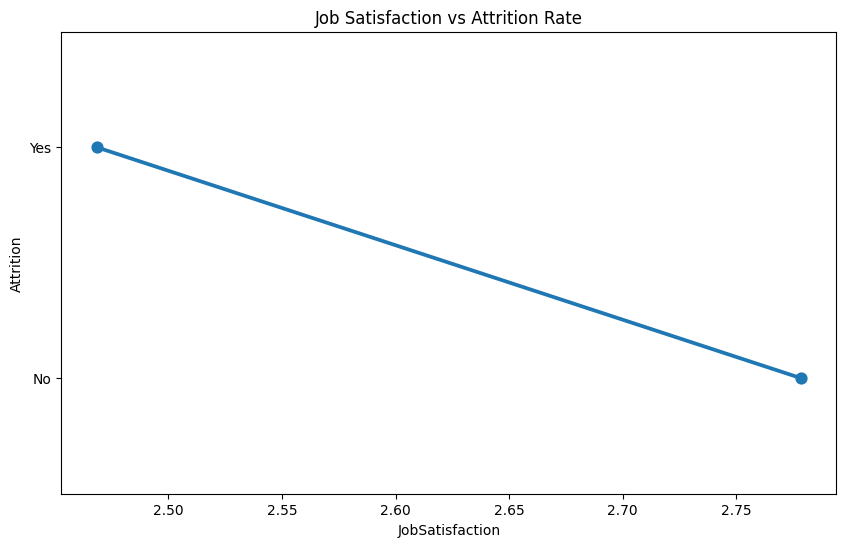

<Figure size 640x480 with 0 Axes>

In [41]:
# Job Satisfaction Vs Attrition Rate

plt.figure(figsize=(10, 6))
sns.pointplot(x='JobSatisfaction', y='Attrition', data=dataset, ci=None)
plt.title('Job Satisfaction vs Attrition Rate')
plt.show()
plt.tight_layout()

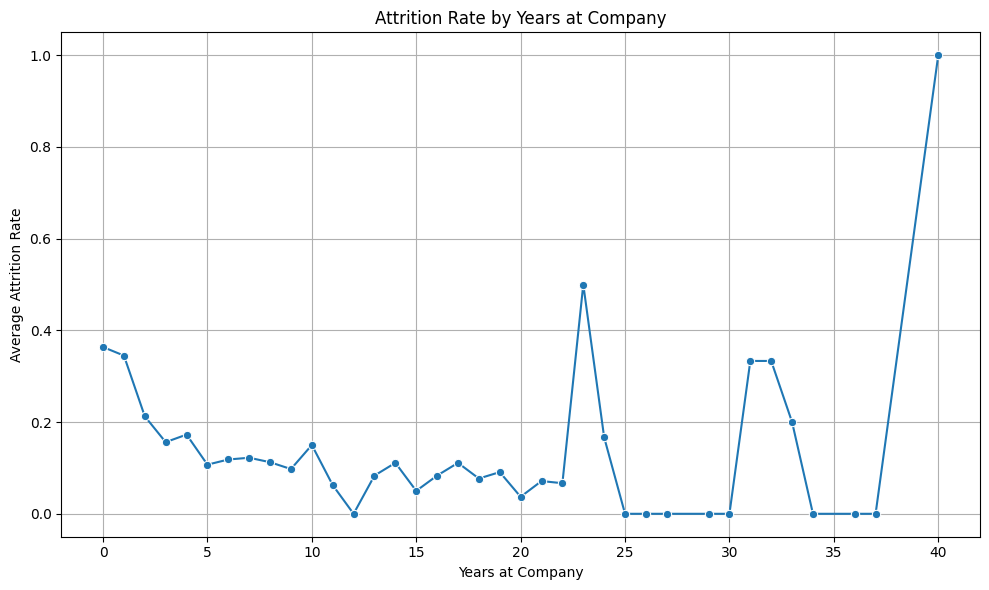

In [42]:
# Convert Attrition to numeric (1 = Left, 0 = Stayed)
dataset['Attrition'] = dataset['Attrition'].map({'Yes': 1, 'No': 0})

# Group by 'YearsAtCompany' and calculate mean attrition
attrition_analysis = dataset.groupby('YearsAtCompany', as_index=False)['Attrition'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(data=attrition_analysis, x='YearsAtCompany', y='Attrition', marker='o')
plt.title('Attrition Rate by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Average Attrition Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

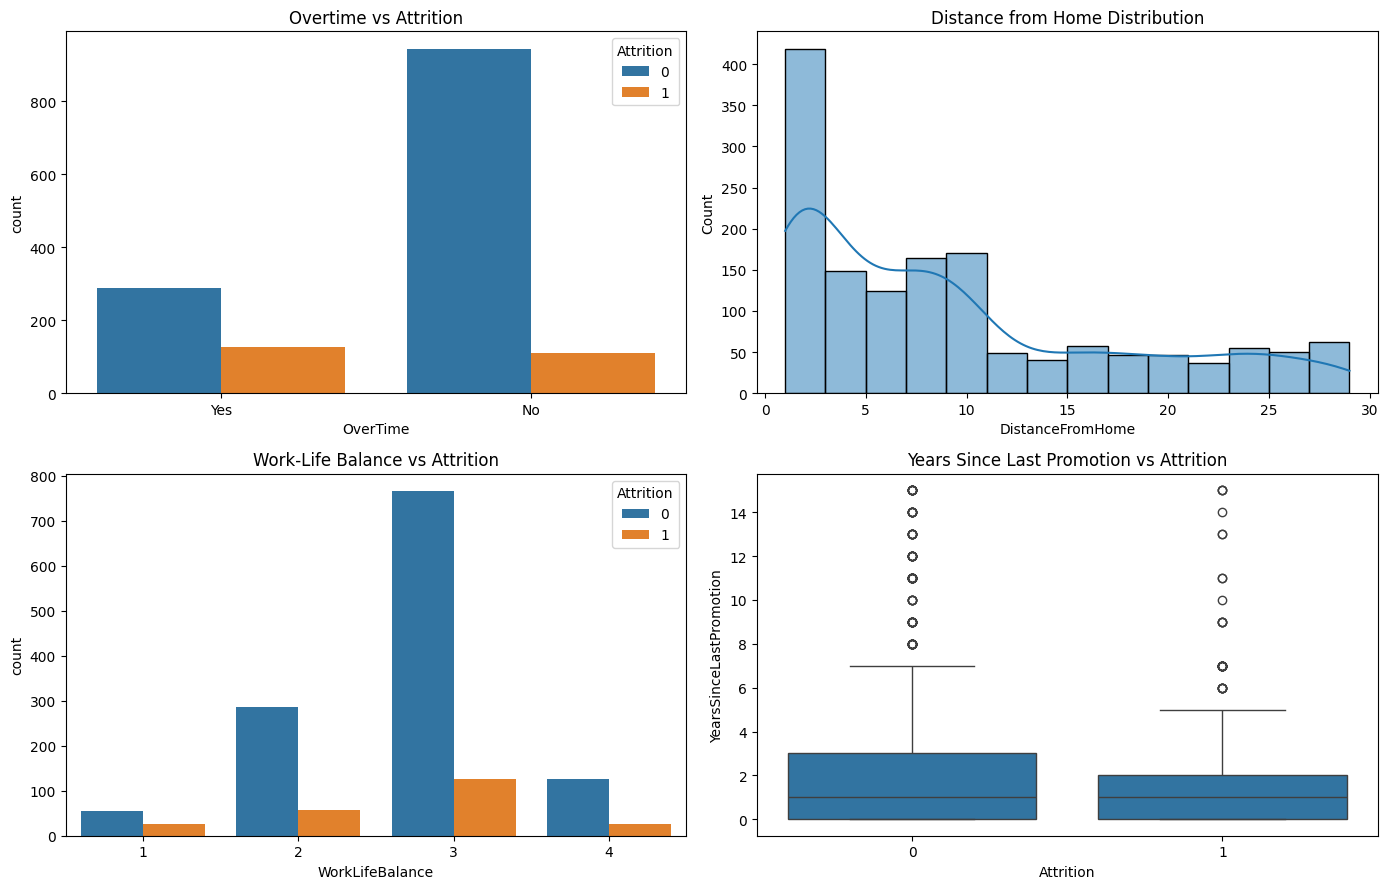

In [43]:
#Subplots: Key metrics in a single view

fig, axes = plt.subplots(2, 2, figsize=(14, 9))

# Subplot 1: Overtime vs Attrition
sns.countplot(x='OverTime', hue='Attrition', data=dataset, ax=axes[0, 0])
axes[0, 0].set_title('Overtime vs Attrition')

# Subplot 2: Distance from Home distribution
sns.histplot(dataset['DistanceFromHome'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distance from Home Distribution')

# Subplot 3: Work-Life Balance by Attrition
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=dataset, ax=axes[1, 0])
axes[1, 0].set_title('Work-Life Balance vs Attrition')

# Subplot 4: Years since last promotion
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=dataset, ax=axes[1, 1])
axes[1, 1].set_title('Years Since Last Promotion vs Attrition')

plt.tight_layout()
plt.show()

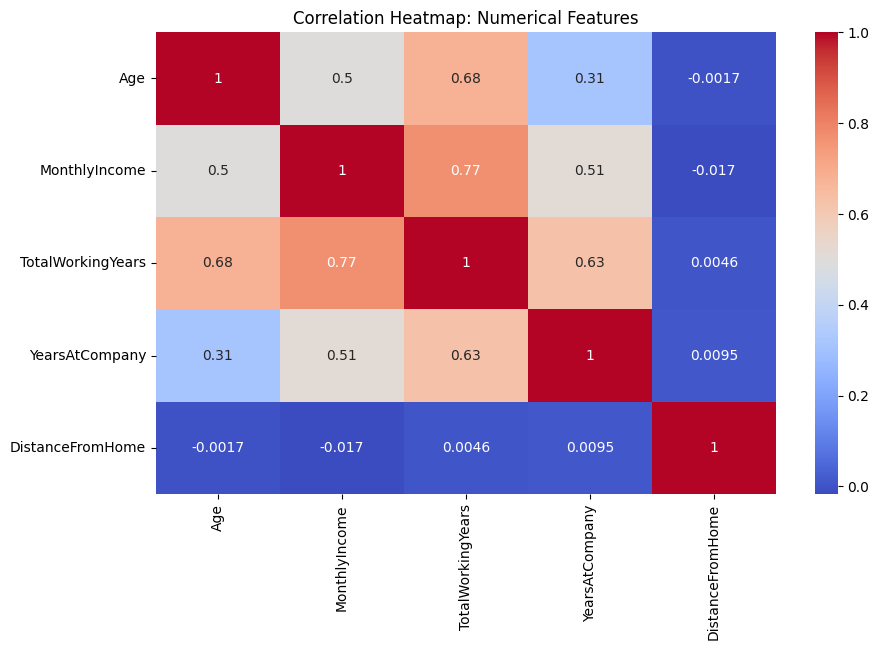

<Figure size 640x480 with 0 Axes>

In [44]:
#Correlation Heatmap (Numerical Features Only)
numerical_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome']
plt.figure(figsize=(10, 6))
sns.heatmap(dataset[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Numerical Features')
plt.show()
plt.tight_layout()

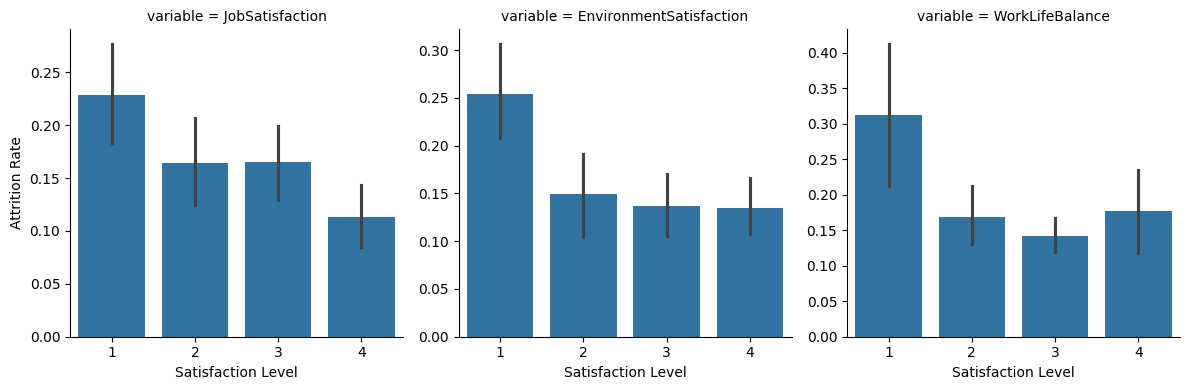

In [45]:
"""  This code gives actionable insights into what drives attrition (e.g., low income, lack of promotions) and how to segment employees """

#Faceted Bar Plots for Satisfaction Metrics
satisfaction_metrics = ['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance']
g = sns.FacetGrid(dataset.melt(id_vars=['Attrition'], value_vars=satisfaction_metrics), 
                  col='variable', col_wrap=3, height=4, sharey=False)
g.map(sns.barplot, 'value', 'Attrition', order=[1, 2, 3, 4])
g.set_axis_labels('Satisfaction Level', 'Attrition Rate')
plt.tight_layout()
plt.show()

In [46]:
#Columns to drop 
columns_to_drop = [
    'EmployeeNumber',       # dropping since this is a unique identifier with no predictive value
    'EmployeeCount',        # Likely constant (e.g., always 1)
    'Over18',               # dropping because most employees are likely to be over 18
    'StandardHours',        # dropping due to non essential 
    'DailyRate',            # dropping due to redundant since MonthlyIncome is kept
    'HourlyRate',           # dropping due to redundant for salaried employees
    'MonthlyRate'           # dropping because MonthlyIncome is kept
]

# Dropping the columns
dataset = dataset.drop(columns=columns_to_drop, axis=1)

# Optional: Check for constant columns (e.g., confirm Over18 has no variance)
print("Constant columns check:")
print(dataset.nunique() == 1)  # If any column returns "True", drop it

Constant columns check:
Age                         False
Attrition                   False
BusinessTravel              False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool


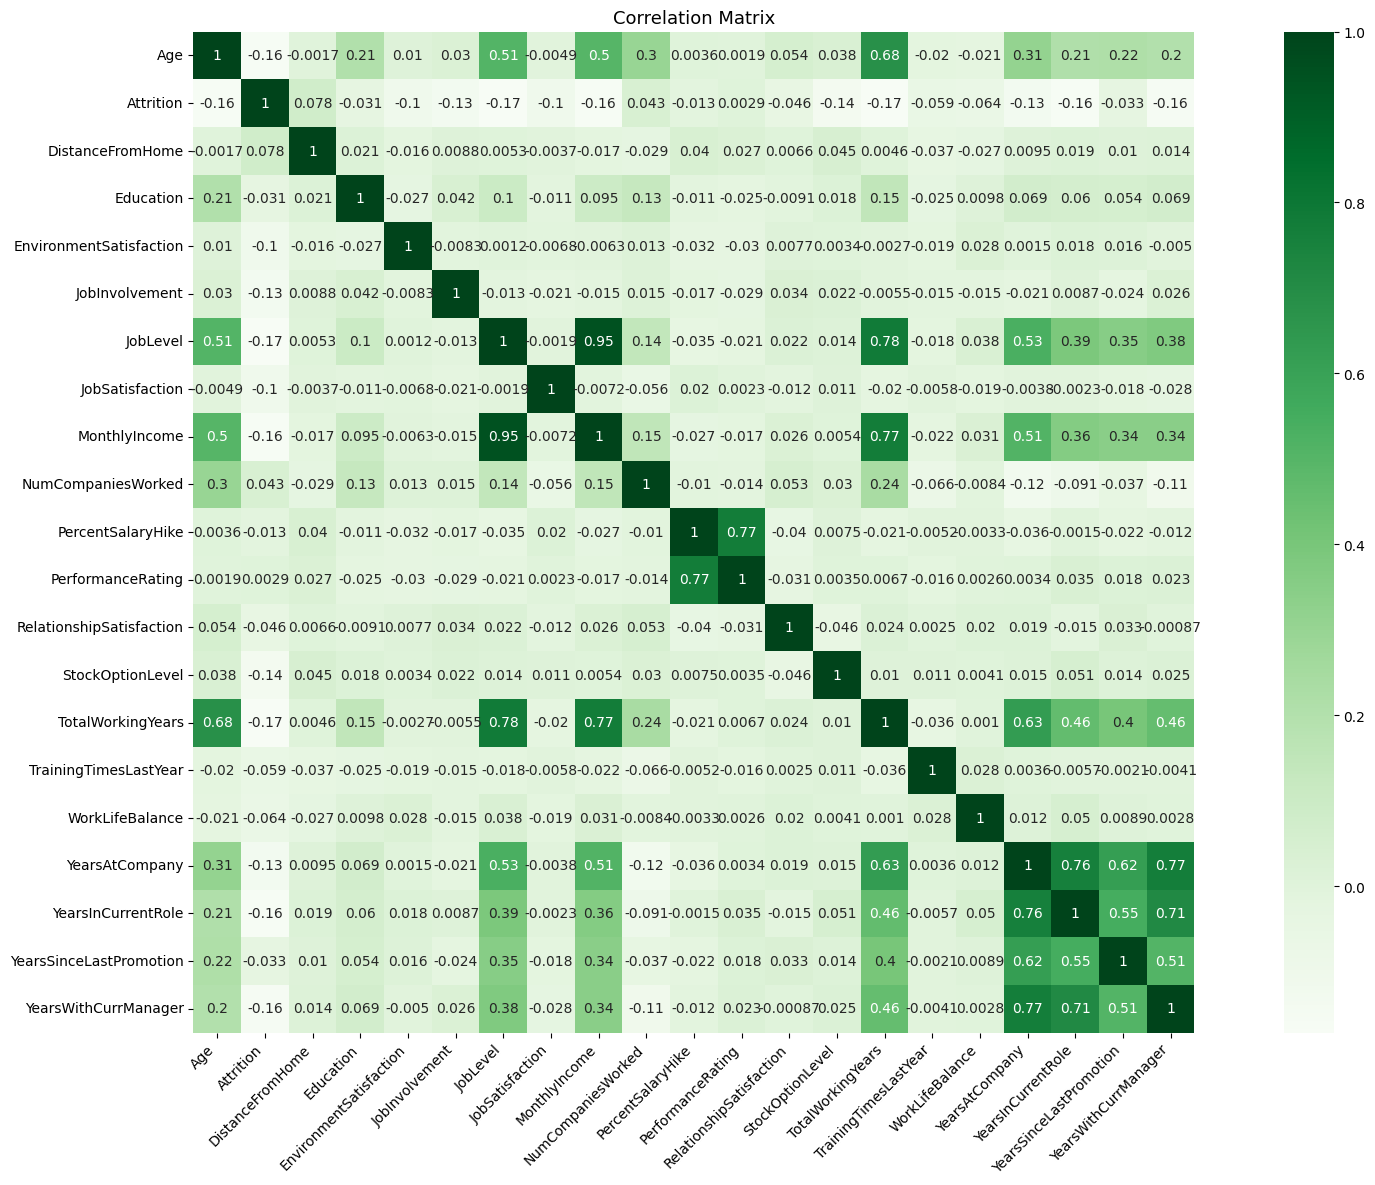

<Figure size 640x480 with 0 Axes>

In [47]:
#Ensuring all columns used for correlation are numeric
numeric_dataset = dataset.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(23, 13))
sns.heatmap(corr, annot=True, cmap='Greens', square=True) 
plt.title('Correlation Matrix', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.show()
plt.tight_layout()

In [48]:
#checking the dataset again after changes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  MonthlyIncome           

In [49]:
dataset.shape
# dataset now has 28 columns 

(1470, 28)

In [50]:
# checking for all categorical columns and their unique values of the dataset
categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
for col in categorical_cols:
    print(f"- {col}: {dataset[col].nunique()} unique values → {dataset[col].unique()}")

Categorical Columns:
- BusinessTravel: 3 unique values → ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
- Department: 3 unique values → ['Sales' 'Research & Development' 'Human Resources']
- EducationField: 6 unique values → ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
- Gender: 2 unique values → ['Female' 'Male']
- JobRole: 9 unique values → ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
- MaritalStatus: 3 unique values → ['Single' 'Married' 'Divorced']
- OverTime: 2 unique values → ['Yes' 'No']


In [ ]:
# coutning attrition
dataset['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [52]:
# Initialize LabelEncoder, # A module use to convert categorical labels in 'Attrition' into numeric labels.
label_encoder = LabelEncoder()

# Fit and transform the 'Sex' column
dataset['Attrition'] = label_encoder.fit_transform(dataset['Attrition'])

# printing the dataset
dataset

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,23,2,Medical,3,Male,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,Research & Development,6,1,Medical,4,Male,2,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,Research & Development,4,3,Life Sciences,2,Male,4,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,Sales,2,3,Medical,4,Male,2,...,3,4,0,17,3,2,9,6,0,8


In [53]:
dataset['Attrition'].value_counts()
# Output: (0 = No, 1 = Yes)

Attrition
0    1233
1     237
Name: count, dtype: int64

In [55]:
# Converting Overtime column to binary (e.g. No = 0, Yes = 1)
binary_cols = ['OverTime']
dataset[binary_cols] = dataset[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

In [ ]:
# counting number of overtime
dataset['OverTime'].value_counts()

OverTime
0    1054
1     416
Name: count, dtype: int64

In [58]:
# counting number of males and females in Gender 
dataset['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [59]:
""" Expected Output: Male → 0 Female → 1 """

# Converting Gender Coulmn to binary (e.g. Male=0, Female=1)
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})
print(dataset['Gender'].unique())

[1 0]


In [60]:
# counting number of males and females in Gender 
dataset['Gender'].value_counts()

# Output: 0 = Males, 1 = Females

Gender
0    882
1    588
Name: count, dtype: int64

In [61]:
dataset['Gender']

0       1
1       0
2       0
3       1
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Gender, Length: 1470, dtype: int64

In [ ]:
# counting number of BusinessTravel
dataset['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [63]:
# Define a mapping for the 'BusinessTravel' column
type_mapping = {
    'Travel_Rarely': 0,
    'Travel_Frequently': 1,
    'Non-Travel': 2
}

# Apply the mapping to the 'type' column
dataset['BusinessTravel'] = dataset['BusinessTravel'].map(type_mapping)

In [ ]:
# checking if Business Travel has been converted to numeric values
dataset['BusinessTravel'].value_counts()

BusinessTravel
0    1043
1     277
2     150
Name: count, dtype: int64

In [65]:
# counting the values of the Department column 
dataset['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [66]:
# Define a mapping for the 'Department' column
type_mapping2 = {
    'Research & Development': 0,
    'Sales': 1,
    'Human Resources': 2
}

# Apply the mapping to the 'type' column
dataset['Department'] = dataset['Department'].map(type_mapping2)

In [ ]:
# checking if Department has been converted to numeric values
dataset['Department'].value_counts()

Department
0    961
1    446
2     63
Name: count, dtype: int64

In [ ]:
# counting the values of the EducationField column 
dataset['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [69]:
# Define a mapping for the 'EdicationField' column
type_mapping4 = {
    'Life Sciences': 0,
    'Medical': 1,
    'Marketing': 2,
    'Technical Degree':3,
    'Other': 4,
    'Human Resources': 5 
}

# Apply the mapping to the 'type' column
dataset['EducationField'] = dataset['EducationField'].map(type_mapping4)

In [ ]:
# checking if EducationField has been converted to numeric values
dataset['EducationField'].value_counts()

EducationField
0    606
1    464
2    159
3    132
4     82
5     27
Name: count, dtype: int64

In [ ]:
# counting the values of the JobRole column 
dataset['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [72]:
# Define a mapping for the 'JobRole' column
type_mapping5 = {
    'Sales Executive': 0,
    'Research Scientist': 1,
    'Laboratory Technician': 2,
    'Manufacturing Director': 3,
    'Healthcare Representative': 4,
    'Manager': 5,
    'Sales Representative': 6,
    'Research Director': 7,
    'Human Resources': 8
}

# Apply the mapping to the 'type' column
dataset['JobRole'] = dataset['JobRole'].map(type_mapping5)

In [ ]:
# counting the values of the JobRole column after convertion 
dataset['JobRole'].value_counts()

JobRole
0    326
1    292
2    259
3    145
4    131
5    102
6     83
7     80
8     52
Name: count, dtype: int64

In [ ]:
# counting the values of the MaritalStatus 
dataset['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [75]:
# Define a mapping for the 'Edication Field' column
type_mapping6 = {
    'Married': 0,
    'Single': 1,
    'Divorced': 2
}

# Apply the mapping to the 'type' column
dataset['MaritalStatus'] = dataset['MaritalStatus'].map(type_mapping6)

In [76]:
dataset['MaritalStatus'].value_counts()

MaritalStatus
0    673
1    470
2    327
Name: count, dtype: int64

In [77]:
# checking the dataset again if values have been converted to numerical
dataset.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,0.392517,0.389116,9.192517,2.912925,1.116327,2.721769,0.400000,2.729932,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,0.568893,8.106864,1.024165,1.289616,1.093082,0.490065,0.711561,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,0.000000,0.000000,7.000000,3.000000,1.000000,3.000000,0.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1.000000,14.000000,4.000000,2.000000,4.000000,1.000000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [78]:
dataset.head()
# All values appear to be numerical now with No NaN values

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1,1,2,0,2,1,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,0,8,1,0,3,0,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,0,0,2,2,4,4,0,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,0,3,4,0,4,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0,0,2,1,1,1,0,3,...,3,4,1,6,3,3,2,2,2,2


In [80]:
# Define target and features
target = 'Attrition'
features = [
    'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 
    'Education', 'EnvironmentSatisfaction', 'Gender',
    'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
    'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
    'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

# Create feature matrix (X) and target (y)
X = dataset[features]
y = dataset[target]

In [81]:
# printing X and y model
X

,Age,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,1,1,2,2,1,3,2,0,...,8,1,11,0,8,0,1,6,0,5
1,49,1,0,8,1,3,0,2,2,1,...,1,0,23,1,10,3,3,10,1,7
2,37,0,0,2,2,4,0,2,1,2,...,6,1,15,0,7,3,3,0,0,0
3,33,1,0,3,4,4,1,3,1,1,...,1,1,11,0,8,3,3,8,3,0
4,27,0,0,2,1,1,0,3,1,2,...,9,0,12,1,6,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,0,23,2,3,0,4,2,2,...,4,0,17,1,17,3,3,5,0,3
1466,39,0,0,6,1,4,0,2,3,4,...,4,0,15,1,9,5,3,7,1,7
1467,27,0,0,4,3,2,0,4,2,3,...,1,1,20,1,6,0,3,6,0,3
1468,49,1,1,2,3,4,0,2,2,0,...,2,0,14,0,17,3,2,9,0,8


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [83]:
# Splitting the model for training after X and y are identified
# 30% data use for testing, remaining 70% for training
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.30, random_state=30)

In [84]:
# Logistic Regression will be used since we have a binary classifications
standard_scaler = StandardScaler()
X_training = standard_scaler.fit_transform(X_training)
X_testing = standard_scaler.transform(X_testing)

In [85]:
# printing our X_training  AND X_testing models
X_training

array([[ 1.94333892e+00, -5.79469908e-01, -6.80163206e-01, ...,
         4.77443774e+00,  5.84434804e-01,  2.50439420e+00],
       [-4.41667937e-03,  9.57320132e-01,  1.05653143e+00, ...,
         3.53715094e-01,  8.96032428e-01,  1.10854238e+00],
       [-6.53668547e-01, -5.79469908e-01,  1.05653143e+00, ...,
         2.62541567e-02,  8.96032428e-01, -5.66479807e-01],
       ...,
       [-5.45459902e-01, -5.79469908e-01, -6.80163206e-01, ...,
        -1.37476312e-01, -6.61955690e-01,  2.71031287e-01],
       [-7.61877192e-01, -5.79469908e-01, -6.80163206e-01, ...,
         3.53715094e-01,  1.20763005e+00,  8.29372016e-01],
       [-8.70085836e-01, -5.79469908e-01, -6.80163206e-01, ...,
        -7.92398185e-01, -3.50358067e-01, -8.45650172e-01]])

In [ ]:
X_testing

array([[-0.22083397, -0.57946991,  1.05653143, ..., -0.30120678,
        -0.66195569, -0.28730944],
       [-1.41112906,  2.49411017, -0.68016321, ..., -0.30120678,
         0.27283718, -0.00813908],
       [-0.43725126,  0.95732013, -0.68016321, ...,  1.00863697,
         0.5844348 ,  0.82937202],
       ...,
       [-0.32904261, -0.57946991,  2.79322607, ..., -0.62866772,
        -0.66195569, -0.56647981],
       [-0.65366855, -0.57946991, -0.68016321, ..., -0.95612865,
        -0.35035807, -1.12482054],
       [ 1.18587841, -0.57946991, -0.68016321, ..., -1.11985912,
        -0.66195569, -1.12482054]])

In [87]:
# Check for NaN values
print("NaN values in X_training:", np.isnan(X_training).sum())
print("NaN values in X_testing:", np.isnan(X_testing).sum())
print("NaN values in y_training:", np.isnan(y_training).sum())
print("NaN values in y_testing:", np.isnan(y_testing).sum())

NaN values in X_training: 0
NaN values in X_testing: 0
NaN values in y_training: 0
NaN values in y_testing: 0


In [ ]:
# printing our y_training AND y_testing models
y_training

270     0
226     0
675     0
826     0
617     0
       ..
919     0
1164    0
500     0
941     0
421     1
Name: Attrition, Length: 1029, dtype: int64

In [89]:
y_testing

461     0
640     0
509     0
788     0
950     0
       ..
1099    0
1004    0
613     0
72      0
678     0
Name: Attrition, Length: 441, dtype: int64

In [90]:
# Check shapes of X_training and y_training
print("Shape of X_training:", X_training.shape)
print("Shape of y_training:", y_training.shape)

Shape of X_training: (1029, 23)
Shape of y_training: (1029,)


In [91]:
# Initialize and fit the Logistic Regression model
Logistic_p_model = LogisticRegression()
Logistic_p_model.fit(X_training, y_training)

LogisticRegression()

In [92]:
# Make predictions on the testing set
y_pred_lr= Logistic_p_model.predict(X_testing)
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# determining and printing the accuracy score
accuracy_lr = accuracy_score(y_testing, y_pred_lr)
print("Model Accuracy:", accuracy_lr)

Model Accuracy: 0.854875283446712


Confusion Matrix:
[[364   8]
 [ 56  13]]


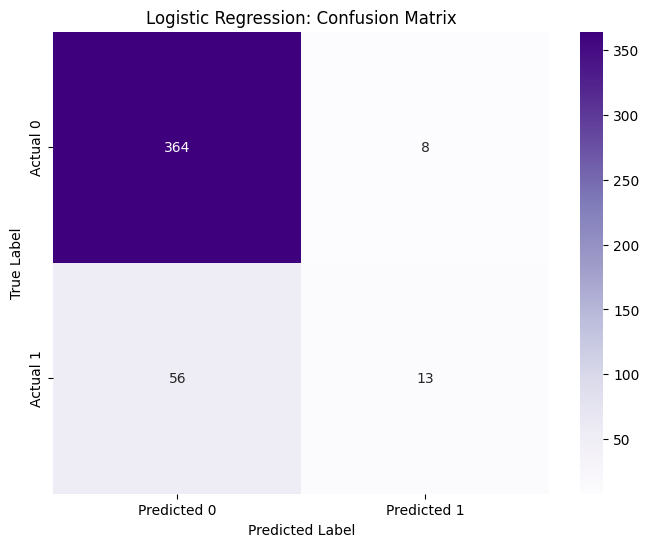

Logistic Regression: Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       372
           1       0.62      0.19      0.29        69

    accuracy                           0.85       441
   macro avg       0.74      0.58      0.60       441
weighted avg       0.83      0.85      0.82       441

F1 Score: 0.8205730777159349
Precision: 0.8279235503725301
Recall: 0.854875283446712


In [94]:
# Confusion Matrix and Classification Report
conf_matrix_lr = confusion_matrix(y_testing, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Logistic Regression: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout
plt.show()

# Classification Report
class_report_lr = classification_report(y_testing, y_pred_lr)
print("Logistic Regression: Classification Report:")
print(class_report_lr)

f1_lr = f1_score(y_testing, y_pred_lr, average='weighted')
print("F1 Score:", f1_lr)

# Calculate Precision
precision_lr = precision_score(y_testing, y_pred_lr, average='weighted')
print("Precision:", precision_lr)

# Calculate Recall
recall_lr = recall_score(y_testing, y_pred_lr, average='weighted')
print("Recall:", recall_lr)

In [95]:
# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=30)
decision_tree_model.fit(X_training, y_training)

# No need to specify the train_test_split again for the Decision since already done it for your Logistic Regression

DecisionTreeClassifier(random_state=30)

In [96]:
# Make predictions on the testing set
y_pred_dtc= Logistic_p_model.predict(X_testing)
y_pred_dtc

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [97]:
# Calculate and print the accuracy
accuracy_dtc = accuracy_score(y_testing, y_pred_dtc)
print("Decision Tree Model Accuracy:", accuracy_dtc)

Decision Tree Model Accuracy: 0.854875283446712


Confusion Matrix:
[[364   8]
 [ 56  13]]


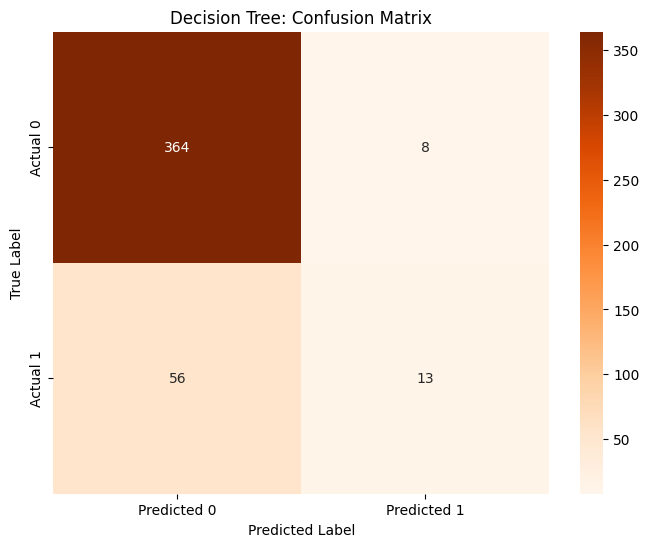

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       372
           1       0.62      0.19      0.29        69

    accuracy                           0.85       441
   macro avg       0.74      0.58      0.60       441
weighted avg       0.83      0.85      0.82       441

F1 Score: 0.8205730777159349
Precision: 0.8279235503725301
Recall: 0.854875283446712


In [98]:
# Decision Tree: Confusion Matrix
conf_matrix_dtc = confusion_matrix(y_testing, y_pred_dtc)
print("Confusion Matrix:")
print(conf_matrix_dtc)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dtc, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Decision Tree: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report_dtc = classification_report(y_testing, y_pred_dtc)
print("Classification Report:")
print(class_report_dtc)

f1_dtc = f1_score(y_testing, y_pred_dtc, average='weighted')
print("F1 Score:", f1_dtc)

# Calculate Precision
precision_dtc = precision_score(y_testing, y_pred_dtc, average='weighted')
print("Precision:", precision_dtc)

# Calculate Recall
recall_dtc = recall_score(y_testing, y_pred_dtc, average='weighted')
print("Recall:", recall_dtc)

In [99]:
# Initialize the Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training data
naive_bayes_model.fit(X_training, y_training)

GaussianNB()

In [100]:
# Make predictions on the testing set
y_pred_nbm = naive_bayes_model.predict(X_testing)
y_pred_nbm

# Calculate accuracy
accuracy_nbm = accuracy_score(y_testing, y_pred_nbm)
print("Naive Bayes Model Accuracy:", accuracy_nbm)

Naive Bayes Model Accuracy: 0.7959183673469388


Confusion Matrix:
[[318  54]
 [ 36  33]]


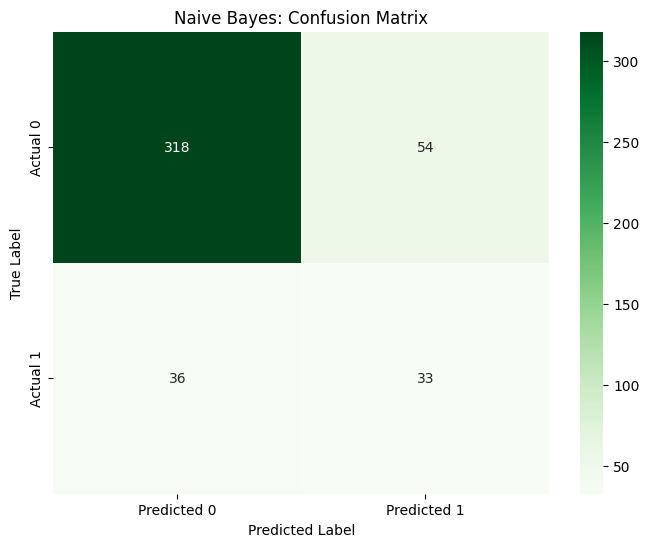

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       372
           1       0.38      0.48      0.42        69

    accuracy                           0.80       441
   macro avg       0.64      0.67      0.65       441
weighted avg       0.82      0.80      0.81       441

F1 Score: 0.805162370097435
Precision: 0.8171018261191092
Recall: 0.7959183673469388


In [101]:
# NB Confusion Matrix
conf_matrix_nbm = confusion_matrix(y_testing, y_pred_nbm)
print("Confusion Matrix:")
print(conf_matrix_nbm)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nbm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Naive Bayes: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report_nbm = classification_report(y_testing, y_pred_nbm)
print("Classification Report:")
print(class_report_nbm)

# calculate F1 Score
f1_nbm = f1_score(y_testing, y_pred_nbm, average='weighted')
print("F1 Score:", f1_nbm)

# Calculate Precision
precision_nbm = precision_score(y_testing, y_pred_nbm, average='weighted')
print("Precision:", precision_nbm)

# Calculate Recall
recall_nbm = recall_score(y_testing, y_pred_nbm, average='weighted')
print("Recall:", recall_nbm)

In [ ]:
# Initializing the standard scaler 
scaler = StandardScaler()
X_training_scaled = scaler.fit_transform(X_training)
X_testing_scaled = scaler.transform(X_testing)

In [103]:
# Initialize the KNN (k Nearest Neighbors) model
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can adjust the  k ie number of neighbors, we used 3 neigbours

# Train the model on the scaled training data
knn_model.fit(X_training_scaled, y_training)

KNeighborsClassifier(n_neighbors=3)

In [104]:
# Make predictions on the scaled testing set
y_pred_knn = knn_model.predict(X_testing_scaled)
y_pred_knn

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [105]:
# Calculate accuracy
accuracy_knn = accuracy_score(y_testing, y_pred_knn)
print("KNN (K Nearest Neighbors) Model Accuracy:", accuracy_knn)

KNN (K Nearest Neighbors) Model Accuracy: 0.8390022675736961


Confusion Matrix for KNN:
[[354  18]
 [ 53  16]]


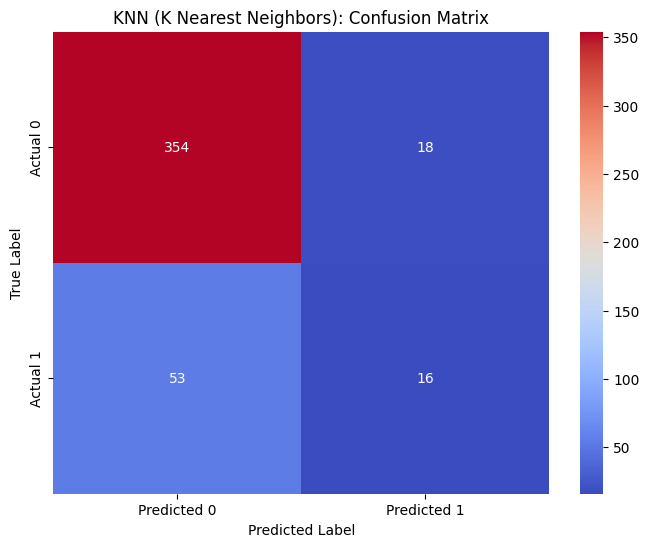

Classification Report for KNN (K Nearest Neighbors)
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       372
           1       0.47      0.23      0.31        69

    accuracy                           0.84       441
   macro avg       0.67      0.59      0.61       441
weighted avg       0.81      0.84      0.82       441

F1 Score: 0.815265049399996
Precision: 0.8073204711860174
Recall: 0.8390022675736961


In [106]:
# KNN Confusion Matrix
conf_matrix_knn = confusion_matrix(y_testing, y_pred_knn)
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)
            
# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('KNN (K Nearest Neighbors): Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report_knn = classification_report(y_testing, y_pred_knn)
print("Classification Report for KNN (K Nearest Neighbors)")
print(class_report_knn)

# F1 Score
f1_knn = f1_score(y_testing, y_pred_knn, average='weighted')
print("F1 Score:", f1_knn)

# Calculate Precision
precision_knn = precision_score(y_testing, y_pred_knn, average='weighted')
print("Precision:", precision_knn)

# Calculate Recall
recall_knn = recall_score(y_testing, y_pred_knn, average='weighted')
print("Recall:", recall_knn)

In [107]:
# Initialize the SVM (Support Vector) model
svm_model = SVC(kernel='linear', random_state=30)  # You can adjust the kernel as needed

# Fit the model with training data
svm_model.fit(X_training, y_training)

SVC(kernel='linear', random_state=30)

In [108]:
# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_testing)
y_pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [109]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_testing, y_pred_knn)
print("SVM (Support Vector) Model Accuracy:", accuracy_svm)

SVM (Support Vector) Model Accuracy: 0.8390022675736961


Confusion Matrix for SVM:
[[368   4]
 [ 60   9]]


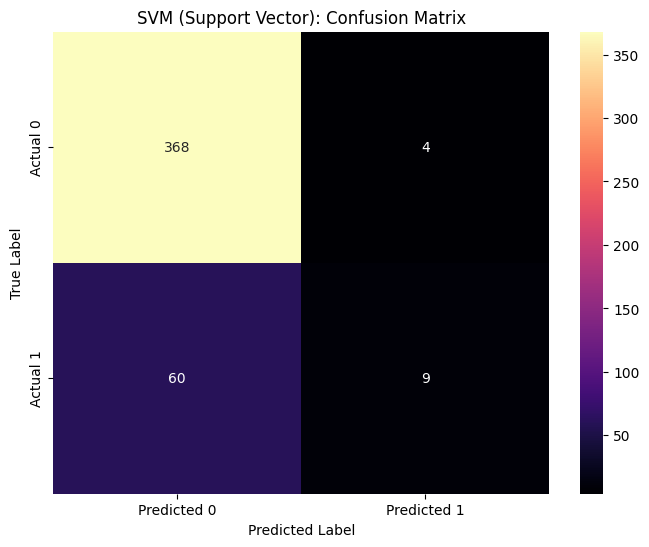

SVM (Support Vector): Classification Report
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       372
           1       0.69      0.13      0.22        69

    accuracy                           0.85       441
   macro avg       0.78      0.56      0.57       441
weighted avg       0.83      0.85      0.81       441

F1 Score: 0.8103998672639787
Precision: 0.8336047575032889
Recall: 0.854875283446712


In [110]:
# KNN Confusion Matrix
conf_matrix_svm = confusion_matrix(y_testing, y_pred_svm)
print("Confusion Matrix for SVM:")
print(conf_matrix_svm)
            
# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='magma', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('SVM (Support Vector): Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report_svm = classification_report(y_testing, y_pred_svm)
print("SVM (Support Vector): Classification Report")
print(class_report_svm)

# F1 Score
f1_svm = f1_score(y_testing, y_pred_svm, average='weighted')
print("F1 Score:", f1_svm)

# Calculate Precision
precision_svm = precision_score(y_testing, y_pred_svm, average='weighted')
print("Precision:", precision_svm)

# Calculate Recall
recall_svm = recall_score(y_testing, y_pred_svm, average='weighted')
print("Recall:", recall_svm)

In [111]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=30)

# Train the model on the scaled training data
rf_model.fit(X_training_scaled, y_training)

RandomForestClassifier(random_state=30)

In [112]:
# Make predictions on the scaled testing set
y_pred_rf = rf_model.predict(X_testing_scaled)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [113]:
# Calculate accuracy score
accuracy_rf = accuracy_score(y_testing, y_pred_rf)
print("Random Forest Model Accuracy:", accuracy_rf)

Random Forest Model Accuracy: 0.854875283446712


In [114]:
# Putting testing results in a data frame
pd.DataFrame({'Actual': y_testing, 'Predicted': y_pred_rf})

,Actual,Predicted
461,0,0
640,0,0
509,0,0
788,0,0
950,0,0
...,...,...
1099,0,0
1004,0,0
613,0,0
72,0,0


Confusion Matrix for Random Forest:
[[367   5]
 [ 59  10]]


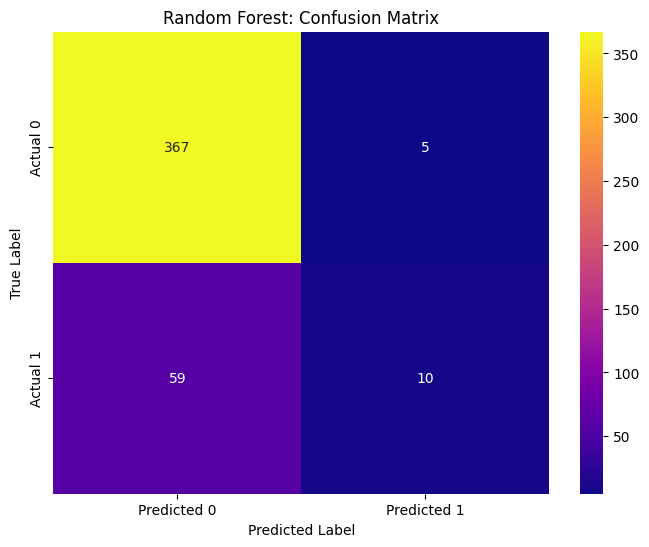

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       372
           1       0.67      0.14      0.24        69

    accuracy                           0.85       441
   macro avg       0.76      0.57      0.58       441
weighted avg       0.83      0.85      0.81       441

F1 Score for Random Forest: 0.8131382878966122
Precision: 0.8310178531506499
Recall: 0.854875283446712


In [115]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_testing, y_pred_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='plasma',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report_rf = classification_report(y_testing, y_pred_rf)
print("Classification Report for Random Forest:")
print(class_report_rf)

# F1 Score
f1_rf = f1_score(y_testing, y_pred_rf, average='weighted')
print("F1 Score for Random Forest:", f1_rf)

# Calculate Precision
precision_rf = precision_score(y_testing, y_pred_rf, average='weighted')
print("Precision:", precision_rf)

# Calculate Recall
recall_rf = recall_score(y_testing, y_pred_rf, average='weighted')
print("Recall:", recall_rf)

In [116]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=30)

# Train the model on the scaled training data
gb_model.fit(X_training_scaled, y_training)

GradientBoostingClassifier(random_state=30)

In [117]:
# Make predictions on the scaled testing set
y_pred_gb = gb_model.predict(X_testing_scaled)
y_pred_gb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [118]:
# Putting testing results in a data frame
pd.DataFrame({'Actual': y_testing, 'Predicted': y_pred_gb})

,Actual,Predicted
461,0,0
640,0,0
509,0,0
788,0,0
950,0,0
...,...,...
1099,0,0
1004,0,0
613,0,0
72,0,0


In [119]:
# Calculate accuracy
accuracy_gb = accuracy_score(y_testing, y_pred_gb)
print("Gradient Boosting Model Accuracy:", accuracy_gb)

Gradient Boosting Model Accuracy: 0.8571428571428571


Confusion Matrix for Gradient Boosting:
[[362  10]
 [ 53  16]]


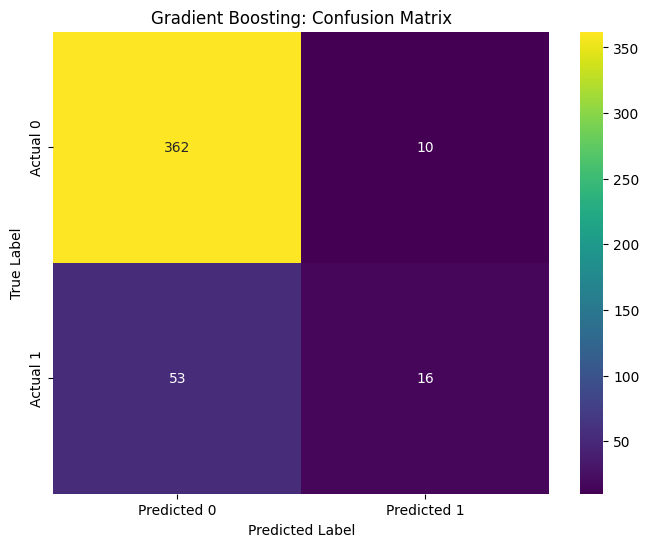

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       372
           1       0.62      0.23      0.34        69

    accuracy                           0.86       441
   macro avg       0.74      0.60      0.63       441
weighted avg       0.83      0.86      0.83       441

F1 Score: 0.8287147347402815
Precision: 0.8320932079968225
Recall: 0.8571428571428571


In [120]:
# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_testing, y_pred_gb)
print("Confusion Matrix for Gradient Boosting:")
print(conf_matrix_gb)

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Gradient Boosting: Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_report_gb = classification_report(y_testing, y_pred_gb)
print("Classification Report for Gradient Boosting:")
print(class_report_gb)

# F1 Score
f1_gb = f1_score(y_testing, y_pred_gb, average='weighted')
print("F1 Score:", f1_gb)

# Calculate Precision
precision_gb = precision_score(y_testing, y_pred_gb, average='weighted')
print("Precision:", precision_gb)

# Calculate Recall
recall_gb = recall_score(y_testing, y_pred_gb, average='weighted')
print("Recall:", recall_gb)

In [121]:
# printing models accuracy scores 
print('models accuracy scores')
print(accuracy_lr)
print(accuracy_dtc)
print(accuracy_nbm)
print(accuracy_knn)
print(accuracy_svm)
print(accuracy_rf)
print(accuracy_gb)

models accuracy scores
0.854875283446712
0.854875283446712
0.7959183673469388
0.8390022675736961
0.8390022675736961
0.854875283446712
0.8571428571428571


In [122]:
# printing models F1 Scores scores
print('models F1 scores') 
print(f1_lr)
print(f1_dtc)
print(f1_nbm)
print(f1_knn)
print(f1_svm)
print(f1_rf)
print(f1_gb)

models F1 scores
0.8205730777159349
0.8205730777159349
0.805162370097435
0.815265049399996
0.8103998672639787
0.8131382878966122
0.8287147347402815


In [123]:
# printing models Precision Scores scores
print('models Precision scores') 
print(precision_lr)
print(precision_dtc)
print(precision_nbm)
print(precision_knn)
print(precision_svm)
print(precision_rf)
print(precision_gb)

models Precision scores
0.8279235503725301
0.8279235503725301
0.8171018261191092
0.8073204711860174
0.8336047575032889
0.8310178531506499
0.8320932079968225


In [124]:
# printing models Recall scores
print('models Precision scores') 
print(recall_lr)
print(recall_dtc)
print(recall_nbm)
print(recall_knn)
print(recall_svm)
print(recall_rf)
print(recall_gb)

models Precision scores
0.854875283446712
0.854875283446712
0.7959183673469388
0.8390022675736961
0.854875283446712
0.854875283446712
0.8571428571428571


                 Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.854875  0.820573   0.827924  0.854875
1       Decision Trees  0.854875  0.820573   0.827924  0.854875
2          Naive Bayes  0.795918  0.805162   0.817102  0.795918
3                  KNN  0.839002  0.815265   0.807320  0.839002
4                  SVM  0.839002  0.810400   0.833605  0.854875
5        Random Forest  0.854875  0.813138   0.831018  0.854875
6    Gradient Boosting  0.857143  0.828715   0.832093  0.857143


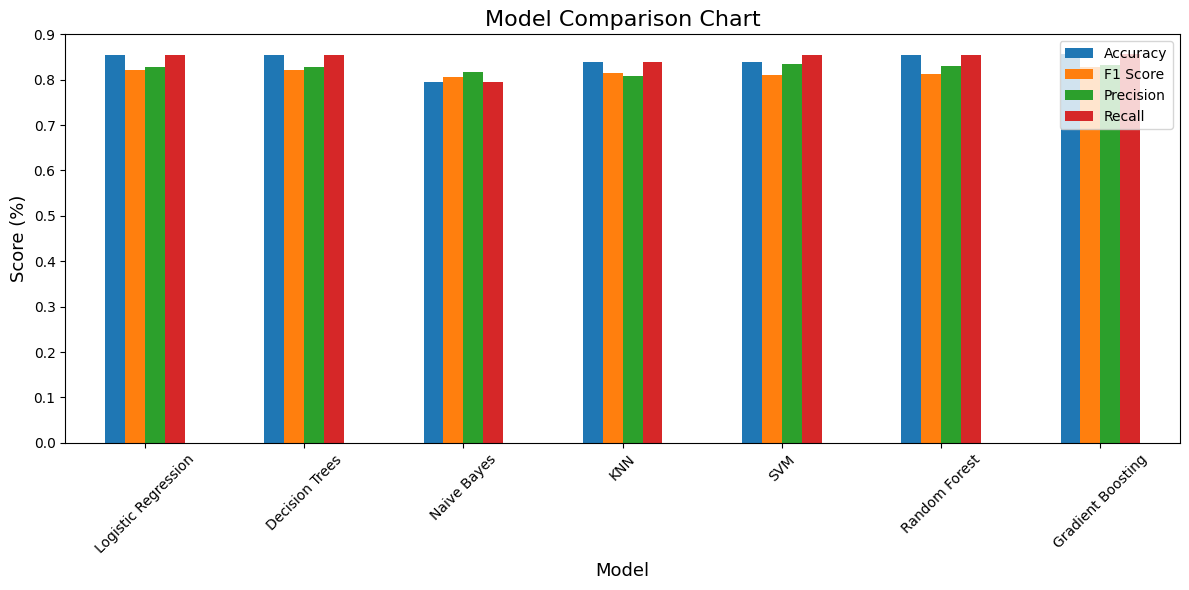

In [ ]:
# Data for the comparison chart
data = {
    'Model': ['Logistic Regression', 'Decision Trees', 'Naive Bayes', 'KNN', 'SVM', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [0.854875283446712, 0.854875283446712, 0.7959183673469388, 0.8390022675736961, 0.8390022675736961, 0.854875283446712, 0.8571428571428571],
    'F1 Score': [0.8205730777159349, 0.8205730777159349, 0.805162370097435, 0.815265049399996, 0.8103998672639787, 0.8131382878966122, 0.8287147347402815],
    'Precision': [0.8279235503725301, 0.8279235503725301, 0.8171018261191092, 0.8073204711860174, 0.8336047575032889, 0.8310178531506499, 0.8320932079968225],
    'Recall': [0.854875283446712, 0.854875283446712, 0.7959183673469388, 0.8390022675736961, 0.854875283446712, 0.854875283446712, 0.8571428571428571]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

# Plotting the comparison chart
df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison Chart', fontsize= '16')
plt.ylabel('Score (%)', fontsize= '13')
plt.xlabel('Model', fontsize= '13')
plt.xticks(rotation=45)
plt.tight_layout()


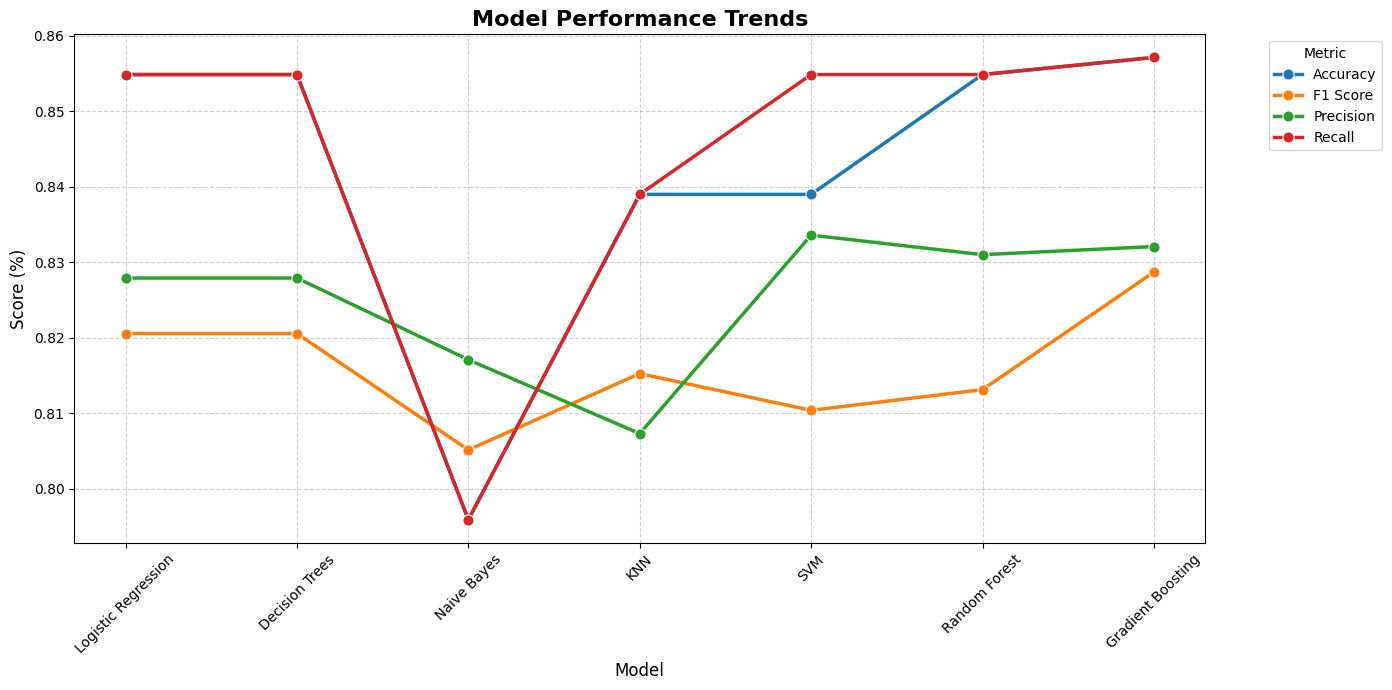

In [126]:
# Reset index for line plot
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create line plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_melted, 
    x='Model', 
    y='Score', 
    hue='Metric', 
    marker='o', 
    markersize=8, 
    linewidth=2.5,
    palette="tab10"
)

# Customize
plt.title('Model Performance Trends', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

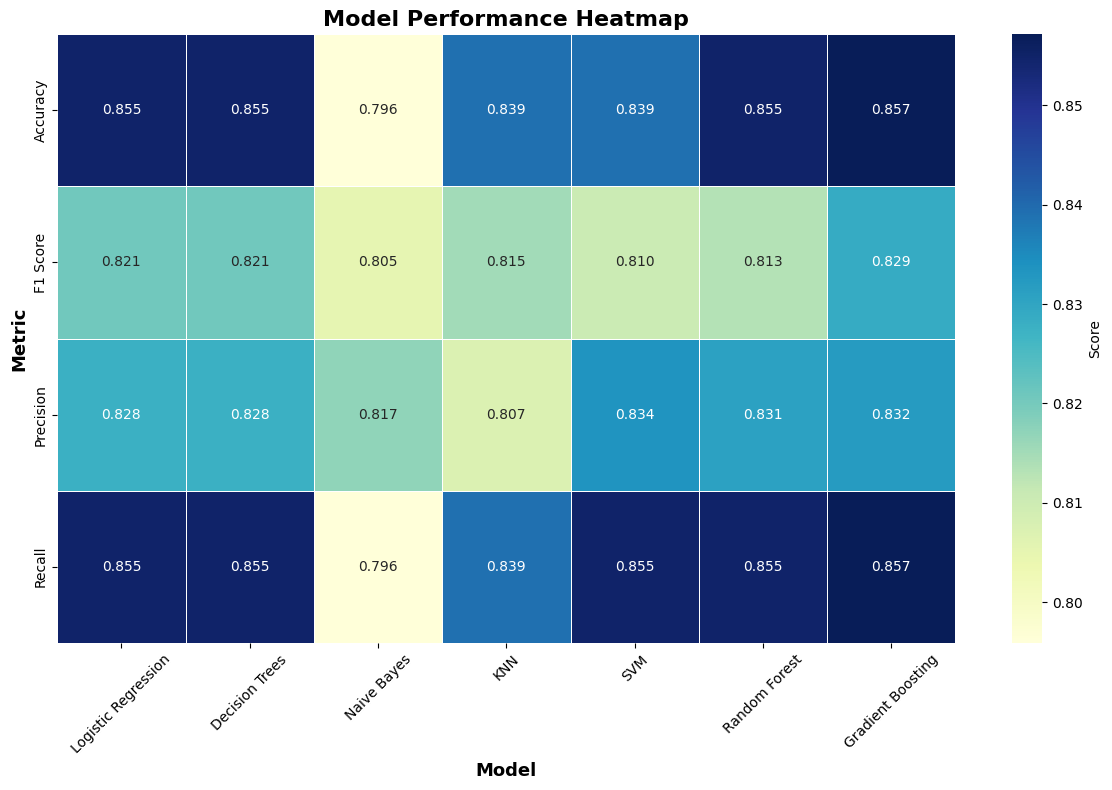

In [127]:
# Pivot the DataFrame for heatmap
heatmap_data = df.set_index('Model')

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data.T,  # Transpose to show metrics as rows
    annot=True, 
    fmt=".3f", 
    cmap="YlGnBu", 
    linewidths=0.5,
    cbar_kws={'label': 'Score'}
)

# Customize
plt.title('Model Performance Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=13, fontweight='bold')
plt.ylabel('Metric', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

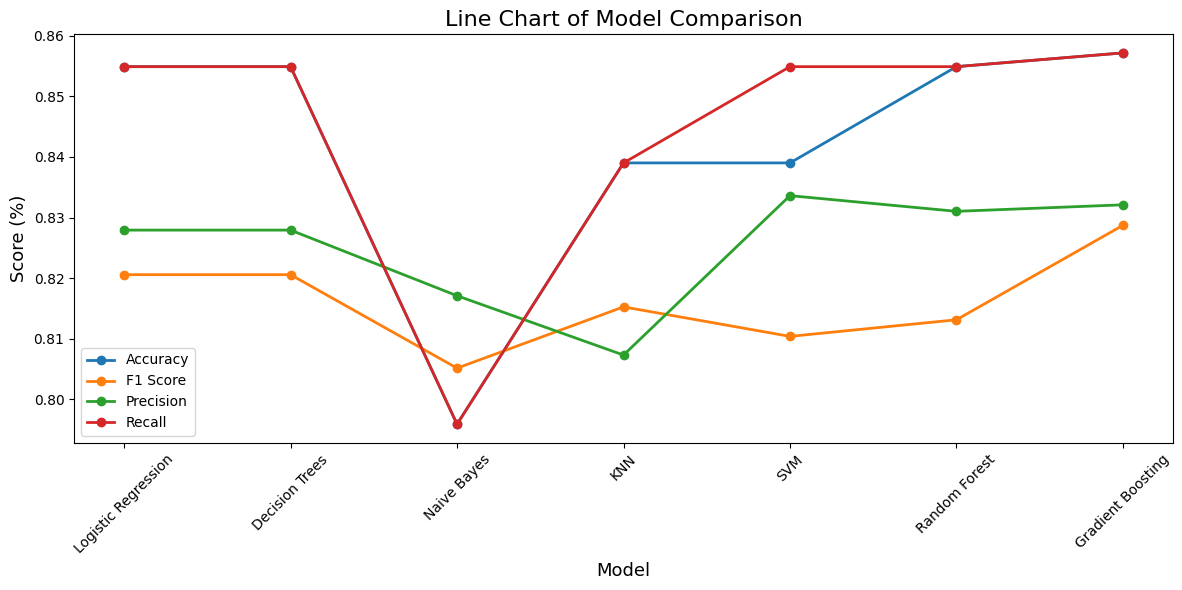

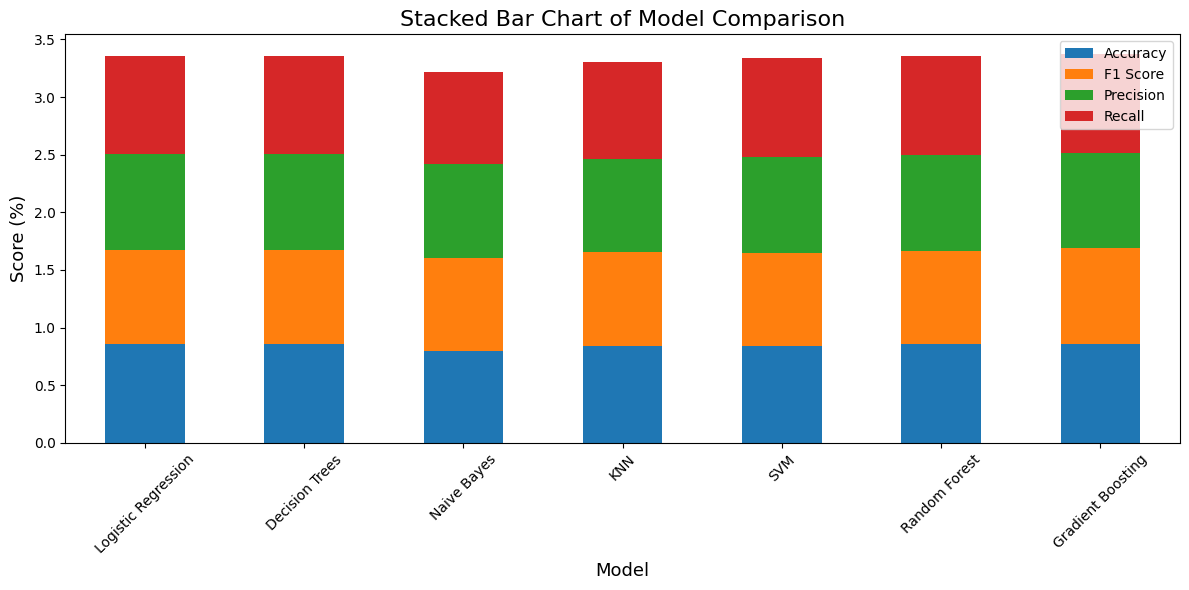

In [129]:
# Line chart visualization
df.set_index('Model').plot(
    kind='line', 
    figsize=(12, 6), 
    marker='o',
    linewidth=2
)
plt.title('Line Chart of Model Comparison', fontsize=16)
plt.ylabel('Score (%)', fontsize=13)
plt.xlabel('Model', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()

# Stacked bar chart visualization
df.set_index('Model').plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6),
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
)
plt.title('Stacked Bar Chart of Model Comparison', fontsize=16)
plt.ylabel('Score (%)', fontsize=13)
plt.xlabel('Model', fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()
